# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

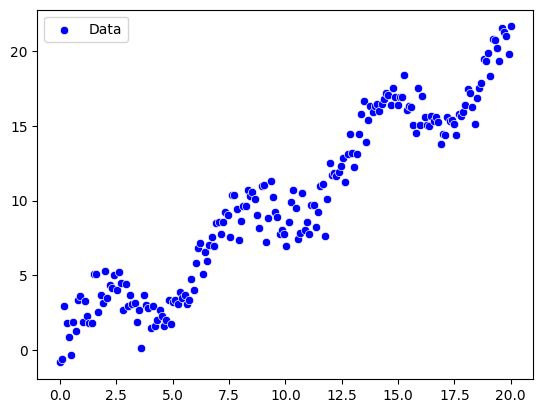

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([-0.8355]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[8.1560]])]

In [8]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)

model_2 = nn.Sequential(
    nn.Linear(in_features,64),
    nn.ReLU(),
    nn.Linear(64,128),
    nn.ReLU(),
    nn.Linear(128,256),
    nn.ReLU(),
    nn.Linear(256,256),
    nn.ReLU(),
    nn.Linear(256,128),
    nn.ReLU(),
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Dropout(0.2),
    nn.Linear(64,out_features)
)


In [9]:
loss_fn = nn.MSELoss()

In [10]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [11]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



<ipython-input-11-f3caa4f47508>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [13]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

191.99644470214844
644.5667877197266
645.1568793058395
649.1426440477371
716.6997119188309
828.5515338182449
1055.8365374803543
1263.3597003221512
1448.6410876512527
1513.0795794725418
1695.6547595262527
1757.7384768724442
1844.3929034471512
2020.944386601448
2070.498299717903
2106.9546176195145
2178.431592106819
2196.3342677354813
2198.70683825016
2241.663091301918
2455.1263633966446
4544.15102159977
4747.475530266762
4759.121619820595
4760.050788342953
4862.146331250668
4885.921065747738
4901.80092471838
5041.392462193966
5048.930314004421
5419.092850625515
5682.014817178249
6098.507553994656
6296.340134561062
6334.707261025906
6335.724694430828
6701.064080417156
6702.2361671328545
6897.491568744183
6966.960326373577
7116.793440997601
7118.781810224056
7120.699499309063
7123.13880866766
7125.015671789646
7130.039106428623
7130.931894540787
7221.579828500748
7338.176431894302
7342.292337656021
7387.317629098892
7569.084276437759
7649.581476449966
7700.209089517593
7728.740587472916
80

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

38.25930404663086
212.05817794799805
260.0486755371094
609.9176330566406
805.4579772949219
838.7719650268555
893.456615447998
970.3364753723145
1149.5807075500488
1326.872486114502
1505.6016883850098
1505.8760569691658
1546.261184990406
1817.1596530079842
2075.4882968068123
2120.896324455738
2145.2981684803963
2163.3159697651863
2163.906593680382
2200.338867545128
2200.3431441285647
2202.907074401621
2230.0047573545016
2230.0646325037815
2233.456577627454
2255.587440817151
2384.2381976530887
2395.877816526685
2396.7066419408657
2539.6879804418422
2812.199119357858
2814.3843374536373
2818.7232866571285
2818.745857265312
3022.647361781914
3184.2092819479294
3399.922859218437
3485.58150484832
3485.685398404021
3500.916603390593
3511.4685881775804
3616.7208312195726
3630.9276269120164
3633.374534670729
3789.6625137967058
3791.910891835112
3793.9196060341783
3928.28529817285
3933.193262402434
3946.9681418580003
4064.655741040129
4072.9850724381395
4086.053382222075
4087.6462406557985
4122.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.215235710144043
18.91784954071045
49.58225727081299
75.11686420440674
100.704026222229
108.93267440795898
193.52206802368164
196.3459496498108
263.3151879310608
263.4059923514724
403.9571398124099
513.6419771537185
546.8443239554763
560.1504314765334
570.3223722800612
590.2224386557937
599.2609346732497
614.9002960547805
619.7926109656692
665.0445144996047
762.7082413062453
806.9220856055617
815.157329402864
839.710157237947
862.9309805259109
863.8211035951972
877.948315165937
889.3535895571113
899.4225068315864
915.1855712160468
935.1915774568915
961.3458838686347
970.749205134809
980.0144944414496
993.9526086077094
1021.7838387712836
1059.775297664106
1059.924513630569
1068.3342435881495
1092.5253637358546
1095.1065941378474
1107.5348082110286
1110.3352957293391
1119.7659378573298
1124.6105914637446
1124.7749524489045
1138.96208909899
1139.6230979934335
1140.2571475282311
1164.436482168734
1166.5627639070153
1177.820289351046
1181.0614573732018
1218.3349787965417
1219.2690979018807

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

88.21355438232422
142.39491271972656
195.37548065185547
196.87250816822052
196.88009956805035
302.746951374691
316.74763515917584
502.75601223437116
503.2216243776493
566.0712032350712
688.4247036012821
749.6820583376102
771.5710735353641
821.0941829713993
831.7280187639408
914.1124792131595
973.3796720537357
974.5421469244175
1020.0671904119663
1024.94723201124
1044.559723618906
1064.036524537485
1134.1528575452976
1154.7078292402439
1156.7096357378177
1248.3353452715091
1365.5531110796146
1374.0615234407596
1399.657556537073
1400.658008578699
1406.7350382837467
1435.7770018610172
1452.945506575983
1453.3350665601902
1508.5575892957859
1508.9099766346626
1517.4236504170112
1544.8935333820991
1595.4445969196968
1701.6479279133491
1715.7220179173164
1718.7819015118293
1720.9480105969124
1728.5574227902107
1764.7715722653084
1782.9916669460945
1786.9370905491523
1848.813982638996
1850.9035009476356
1880.2092756363563
1902.5383028122596
1902.541524057975
1907.6828895860817
1951.9591995531

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

25.51333999633789
25.57870791107416
32.12059662491083
33.964221335947514
35.55764553695917
42.63684246689081
43.26444838196039
59.88558981567621
73.42616675049067
79.14523623138666
100.70141146332026
112.7037679925561
128.79291937500238
183.0874635949731
184.38165364414454
201.52976117283106
202.1540366783738
203.47681442648172
205.69246546179056
223.84301630407572
250.59623972326517
260.682056106627
311.6040989533067
314.3276206627488
326.4762784615159
356.05574432760477
359.5270780697465
372.7654756680131
377.7868947163224
379.8939074650407
409.92001143842936
410.6798246279359
429.3750512972474
452.5274236574769
460.92044047266245
472.938568867743
482.4405086413026
609.5852687731385
705.8013027086854
719.9184797182679
748.393140591681
808.9515741243958
812.276777304709
815.4428697004914
820.6662559881806
845.3368435278535
851.7003889456391
868.3575220480561
878.3335400000215
913.4041309729218
929.2212458029389
932.5562000647187
933.0646483674645
955.0304915681481
955.8330955281854
10

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

14.321614265441895
34.92745494842529
131.7399778366089
163.0978136062622
163.5643121600151
166.45450443029404
197.8664612174034
218.83428806066513
219.43061566352844
237.4158890247345
269.65317463874817
286.0204231739044
328.0611870288849
334.1661570072174
334.2014202699065
338.4813141450286
343.10284086316824
358.15636106580496
375.0543064698577
381.8104557618499
385.9236340150237
389.29360362142324
453.1313225850463
457.4245640859008
469.75783129781485
469.7696347152814
478.31948231812567
481.1296958839521
484.5497701084241
495.4403693592176
527.4100844776258
598.9569213306531
599.3094847416505
623.1043703770265
626.5799164986238
626.5817226489307
640.777675064397
641.4080176075222
641.4455129449489
742.3212529962184
748.6308080499293
785.7803365533473
848.1155835931422
857.505077535403
862.6163236444118
876.422892743838
876.9970294182422
932.4038096611621
1000.879868621123
1011.5151511376025
1012.8743232433917
1012.8946691734018
1013.2795623225393
1095.050985662383
1150.461214391631

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.43094825744628906
6.343123912811279
6.389547258615494
13.708712965250015
13.872415006160736
41.02223914861679
44.546484649181366
50.721480548381805
50.722871313104406
59.44385195733048
72.16294241906144
161.5992140865419
171.21595812798478
195.8731980419252
199.12638379097916
200.17697430611588
200.17799834080506
202.07151190110017
212.18031088181306
226.31567541428376
260.89891592331696
261.96559957333375
263.3369388944702
266.06036142178345
279.4541869527893
279.9621376163559
283.5882190830307
283.58829725541
290.4579099491966
291.8322528675926
297.65739095963363
306.06539190567855
369.59842718399887
370.17673081911926
380.6610094980133
380.6670437716675
394.98676403991703
413.5586501025391
427.9614354037476
429.5824403428269
458.5508584641648
458.7225005590153
473.8776290380192
474.8054900132847
474.81312284951855
491.1625128794258
513.3405448008125
515.5186389494484
520.1690009642189
531.3593352842872
582.0616363096779
593.7784732389991
593.7784741071382
593.8391752575853
612.333

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

21.546289443969727
22.18330407142639
23.208616375923157
54.96231663227081
55.91950523853302
61.097616314888
78.6636792421341
86.71906673908234
87.10494148731232
94.80681335926056
94.8591928333044
146.48022936284542
169.30914781987667
169.52536010742188
169.52792672556825
172.28178743761964
172.28205813188106
179.9392718197778
180.15234842617065
188.39643659908324
189.25610163528472
191.40244176704437
193.93452265579253
240.5923862727359
245.26978113967925
259.4053678782657
260.9040966304019
266.1902332575992
304.366701153107
316.02625181991607
322.62722924072295
326.1430921824649
337.01496699173003
364.66836932022125
364.7025267602876
443.7825591089204
450.69098968524486
452.7727136136964
459.980153513141
460.81324739474803
524.7316243173555
558.6325909616426
558.6739387223497
571.174916238524
620.3095903107896
622.7541656205431
622.8016199702397
684.8132204646245
684.9222904229537
684.9622640283778
684.9973005736247
715.9258913481608
744.7076410735026
745.5632426226512
748.43070859555

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8365304470062256
41.55385756492615
54.515515089035034
133.22264552116394
195.74743723869324
195.84183014929295
230.00591553747654
232.21052779257298
232.78119249641895
235.67470140755177
239.8746454268694
239.9651371613145
240.2557301595807
241.1984233930707
252.1490030363202
252.98646403104067
259.4332637861371
267.3209695890546
270.80872655659914
305.40775991231203
305.53761453181505
330.0383088067174
331.6987913325429
348.3107584193349
356.1370456889272
370.7358778193593
371.201277859509
404.2399398162961
410.77550280839205
413.3425859287381
422.4457162693143
436.74433267861605
441.21076572686434
444.65032804757357
449.06538999825716
450.049474067986
450.0634892638773
450.09281153418124
453.76488132216036
466.525963017717
480.05819339491427
480.832810530439
507.37102616764605
507.50309906341136
507.95052946545184
517.3535407874733
537.9939693305641
537.9939949397667
537.9944763135136
540.031950230521
638.4889891099156
645.8251364182652
662.202589268607
663.2935268830479
664.094505

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

23.96027374267578
33.35250282287598
44.585883140563965
45.066694498062134
75.31340050697327
97.66516709327698
98.21745139360428
98.47781482338905
98.50398238562047
101.02815397642553
101.47337864898145
113.01648282073438
113.01748746982776
113.27345452061854
115.74091157666408
119.75638351193629
119.88499501696788
120.41157618514262
125.1949404811021
125.30142128816806
125.30188049285789
128.84980882614036
140.9184152027883
142.86412216632743
142.87271687205066
143.15657716806163
146.44104891832103
149.6224525552534
151.07810073907604
160.96474414880504
167.6575494390272
167.66700662768562
193.03868402636726
200.8934050957032
214.0587808052369
240.011900083191
240.49422232902725
257.7725846031972
261.9399725655385
269.40879123008926
269.99968485630234
277.92775206363876
288.04168848789413
309.18048243320663
309.9422071436711
329.9945867518254
330.5413684109517
331.0306300977536
331.0982183153101
333.730787866778
333.85621553010424
335.8137479359575
343.9442239338823
343.954449187062
36

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.40175172686576843
3.938311070203781
4.21927472949028
12.206812113523483
13.244115203619003
13.890948981046677
23.397886008024216
23.562417149543762
23.69029574096203
36.00758604705334
44.955470606684685
45.08258098363876
49.20356887578964
60.70581191778183
67.41190475225449
111.06301635503769
133.34750121831894
133.5006036311388
164.0139493495226
168.33162923157215
169.2997214347124
179.60737581551075
181.00326950848103
182.61203594505787
194.90262432396412
195.315303966403
197.0545448511839
197.35341270267963
197.45602196455002
197.70766520500183
198.43271672725677
202.25846374034882
245.23639571666718
245.25769380107522
247.4030490256846
250.33581164851785
250.39697750285268
252.90499003604054
253.42752816155553
264.30897118523717
265.1914313621819
266.62850959971547
269.71568043902516
269.7826170511544
271.8443238325417
278.8963305540383
279.0976931191981
299.14238611236215
316.495648059994
321.91778579726815
355.15667739883065
355.3769684769213
356.61902568116784
357.364691052585

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.9808313846588135
42.026859521865845
46.47791790962219
47.50564682483673
64.26399147510529
73.9846431016922
76.0919519662857
78.18961703777313
85.04290187358856
86.36534667015076
87.08301758766174
103.74098992347717
103.74359767627902
106.74326436710544
110.82241409015842
115.5390707750339
115.550156845944
117.13499249448068
117.94598819245584
117.95510935154743
119.67860841122456
121.03331600991078
136.95282780495472
137.15402939287014
145.22389938798733
150.49879839387722
151.3460129138548
151.35401436616667
151.35488546080887
154.0275632161647
154.47846982069314
155.0535307843238
165.39404973573983
170.08807382173836
170.11605465225875
170.15823323093355
180.17162472568452
180.34710953198373
181.04377690516412
182.30800965987146
188.0082240458578
188.9541756864637
190.50345609150827
190.6558356191963
191.3854498770088
220.1145701315254
223.07475184462965
253.3387994673103
253.3678130917251
254.47189066931605
257.2498657517135
260.7667279057205
277.5179676823318
278.16751412674785
3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.28126049041748
15.309887174516916
22.753612760454416
25.818546537309885
31.731672052294016
32.30288190022111
37.626337233930826
38.532657865434885
112.08233285322785
115.83945680037141
157.83276963606477
158.1920303143561
158.6944984830916
172.85991424694657
191.48691314831376
193.5122908987105
198.8292526639998
199.61629337444901
199.61658791976515
200.77616910415236
201.53029195743147
201.53452521341387
241.38377219217364
273.18455534952227
273.7929013945395
282.26674592273775
288.56862818973605
292.3184574820334
293.9771831013495
302.98865389602724
303.34436651843134
306.9993006862933
313.1890980877215
313.5330069937045
315.4679908432299
329.33559128420893
329.7921014704043
332.8583343900973
333.4078142918879
334.1348331250483
348.2499501981074
351.3668766297633
353.3065728225047
361.43615808861796
361.9593774952227
370.142447678023
370.2821016140515
371.0426913924748
371.8429534860188
371.8714393187547
375.7394460249925
394.03060470113996
394.3286735821748
394.4755970943952
394.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4144630432128906
2.160360276699066
7.480682790279388
7.557286202907562
7.598085828125477
9.191507644951344
10.85549683123827
11.895852990448475
12.15199688822031
12.418266452848911
13.435421623289585
13.565492503345013
24.3768757507205
24.381249075289816
29.799843435641378
31.479516272898763
31.493445006664842
31.52480204915628
31.766530787106603
62.483051096554846
62.62540999567136
63.14598832046613
72.27044949447736
80.87755188858137
90.34739193832502
95.97420916473493
96.1537218443118
97.45710221445188
102.06411687051877
102.06549443630502
102.76196875004098
103.06338836578652
106.73340799240395
106.77149687288329
107.20704380748793
107.35994776664302
107.37379973335192
134.33766882820055
134.66184657020494
134.90364282531664
153.86784952087328
189.60112588806078
287.10910623474047
310.7872964660637
310.8525722469203
310.8774621649645
312.37315751751885
314.42421366414055
314.8053027256392
316.2511011227034
332.9165178402327
399.8149095638655
409.8335558040999
422.820327387657
424

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

42.958927154541016
45.924164056777954
46.23191395401955
47.21035584807396
89.73839768767357
111.2852803170681
111.31517248786986
135.32766371406615
138.50416594184935
143.58619385398924
170.36290245689452
170.847883278504
173.41708760894835
173.66752170957625
181.04020809568465
181.6104493085295
181.66675659827888
186.2585143726319
191.18473526649177
197.23892351798713
197.80360790900886
202.20316931419075
202.41400758735836
204.35593645088375
208.883510036394
217.0507406424731
221.03943435661495
230.45377532951534
240.98797504417598
241.02141644991934
263.82333066500723
265.098567629233
265.3150467220694
265.92962407507
266.8766946736723
267.45954715646803
270.7664462272078
286.44766151346266
286.4492203509435
301.35376518126577
305.26189916487783
308.17582552786916
315.6227883612737
315.63925676513463
315.6542914034799
329.7105839373544
358.8749268176034
374.76751829404384
383.5364477755502
385.99612046498805
387.2626280905679
388.07616169471294
388.4299960853532
392.94712073821574
3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.687342643737793
6.846709966659546
18.585716009140015
42.07599234580994
42.09055194538087
42.127271491102874
46.56966622453183
46.819942641071975
46.8445140151307
47.323086890392005
47.49483785312623
48.57747552078217
50.02707538288087
51.13949546497315
51.95008710306138
53.10759261529893
61.77703288476914
63.37839177530259
64.61966255586594
64.62346392986365
64.62626277678646
78.52637778990902
130.5840979742352
136.15041076415218
198.48461257689632
264.964760892326
355.60801040404476
355.6083718048176
356.75084180699196
357.2311500714859
364.61082450614776
381.5136870549759
383.6953684495529
399.9931132005295
414.9665133164963
415.6245458530029
423.2927363322815
426.11114625202026
430.78634576068725
450.6137288020691
455.793262283667
476.4906099246582
478.5179276870331
483.07788042293396
483.39052138791885
495.99517570005264
516.3634255932411
519.3739265011391
538.1124042080482
540.1183296249947
564.8194938706001
578.9250007675728
581.2944320248207
581.6361295090755
583.8430334435543

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5675380229949951
2.6221494674682617
5.187888145446777
9.226241111755371
14.080227851867676
18.16851234436035
30.11802101135254
30.62883073091507
88.46167069673538
95.73312550783157
97.97474485635757
102.20654398202896
102.7477895617485
144.02747172117233
144.3790397644043
152.7354965209961
153.12608218193054
161.52515387535095
161.53852530941367
165.61885377392173
165.62893105577677
168.80880237650126
170.87131715845317
177.1917240722105
183.76489139627665
185.6862592799589
193.69768525194377
193.72930222656578
200.5830515017733
201.47432303335518
204.07624673750252
229.10574388410896
232.87622237112373
232.88575510960072
234.84573869686574
236.46193592529744
236.83037378173321
237.72266747336835
237.72538391500711
238.1175231412053
238.17879470437765
240.32936676591635
243.55653294175863
245.86025365442038
249.3947330340743
249.4363749101758
250.9122119024396
277.4021449163556
280.1347174718976
280.41049180179834
285.52166257053614
285.53602663148195
289.64021984208375
289.744842273

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2935912609100342
4.886971473693848
5.5338996052742
6.340896368026733
9.927069664001465
30.495213508605957
31.015456438064575
57.58614468574524
57.93542522192001
59.33777588605881
65.58184546232224
91.23289793729782
105.45861834287643
109.57669132947922
112.08001106977463
114.16488879919052
126.33050292730331
145.56583923101425
149.01950520277023
231.4431807398796
385.65393513441086
439.06945103406906
440.35753470659256
446.83732253313065
457.54355841875076
457.54476217203774
457.62590447836556
460.43882671766914
463.6872846262995
464.2608715670649
471.71078459196724
472.5863595979754
475.4467123525683
477.48691377812065
477.9498149829451
496.10324401431717
496.34060787432827
500.8988907265011
501.3983106839005
510.602383636171
511.1174208151642
511.2616026478354
511.5497634487692
556.5623862820212
556.8397494631354
556.8411539363442
567.6278923320351
590.9531162547646
590.9740948117105
592.5460982954828
592.551873168326
593.0539061039453
595.0318756311899
609.1518984049326
609.554639

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.292532920837402
42.62904644012451
42.67465639486909
51.42951155081391
51.780680511146784
53.073696348816156
53.25220875814557
59.27454238012433
81.01709036901593
89.89432482793927
90.41251956298947
94.03004275634885
97.13560377433896
108.01873289421201
108.4857034869492
110.82141115143895
110.87289610505104
111.73416677117348
111.7927767559886
113.7422955557704
113.76354502514005
115.15088855102658
117.80657183006406
119.52038000896573
119.75125405564904
121.09535405412316
122.37795278802514
123.15228250995278
123.23594001308084
124.93765178695321
128.88801542297006
133.47015825286508
134.82968560233712
135.0542946793139
147.00636873021722
149.58906397596002
153.40411147847772
177.53912315145135
202.75710067525506
203.35198352113366
203.9221951700747
204.12232703343034
217.66880053654313
245.61598414555192
249.46577948704362
249.50055349245667
253.92097556963563
260.5907276906073
260.6159236691892
296.66441610082984
296.7706703208387
298.6185603402555
299.64672723039985
299.730633448

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.07838716357946396
0.2586173638701439
0.8454504832625389
5.765306077897549
5.833901159465313
7.9298040792346
18.589894525706768
37.30065845698118
39.41845487803221
42.68299459666014
43.5259133502841
51.45012008398771
56.737791649997234
56.8116954267025
67.30060705542564
68.62810322642326
80.12745472788811
80.62460604310036
88.31576529145241
90.98201790452003
103.40207424759865
122.31219235062599
136.19982281327248
194.4870389997959
208.4882587492466
216.44243755936623
259.6579259932041
262.1414367258549
286.68994441628456
291.1592241823673
299.34002462029457
309.1965185701847
309.1989744398743
309.200099803973
316.32374034123495
321.4795697708614
339.94854865269735
345.8170441170223
345.836095622275
346.6207784325816
354.8373378426768
371.65440403530374
372.0115525634028
380.4149262816645
383.92696522781625
390.03943299362436
391.2163885743357
392.2381584555842
394.0301697165705
394.3711228282191
408.22827004501596
421.4278969676234
435.83247040817514
435.85652386257425
511.2330192239

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.313876152038574
4.849664390087128
30.167152106761932
30.410581171512604
31.069284558296204
31.522035598754883
35.991480350494385
37.5133273601532
38.00880640745163
38.31558600068092
38.99603995680809
39.19187754392624
39.19677680032328
41.990544729400426
45.4886409570463
48.93360679643229
49.89053510921076
81.19741224544123
89.21128916041926
91.9451639582403
92.55388938682154
92.68935482995585
92.70954428659752
94.56830106722191
99.43573032366112
99.5681535010226
100.0314358775504
108.63740816758946
110.07099583791569
117.0045404736884
117.24955686973408
118.30982384132221
120.9420250360854
123.18250784324482
123.34424716280773
127.07686620997265
129.73298007296398
132.4003930692561
133.68325430201367
135.9753475789912
136.90800261544064
137.43508946942165
137.56535078631714
137.92921249615029
142.1698755477555
153.95792238460854
154.26905755745247
164.43263654457405
188.66143254982308
225.70502309547737
227.15989987598732
228.4497235273011
229.07874988066033
232.98107932554558
245.1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.1677403450012207
2.257917359471321
6.650145009160042
6.899487406015396
17.742622286081314
18.373801559209824
25.254411548376083
25.2665948048234
45.29743853956461
48.44049326330423
55.31274048238993
65.6371957436204
71.03744856268167
78.99666563421488
84.57520262151957
87.57874218374491
105.13771549612284
118.57433048635721
131.91875282675028
134.16178027540445
134.32283436506987
135.29644148796797
135.42407738417387
135.77315505594015
144.99187739938498
171.6159199103713
181.95932181924582
192.51498206704855
212.17854293435812
212.38761318475008
213.70957661420107
214.61282838135958
265.5398379638791
265.675569601357
267.03677935153246
267.5388440564275
267.6128894612193
267.7995039150119
278.9311329051852
287.32267724722624
287.6335509046912
288.9204389080405
289.1941287741065
289.27325662225485
290.1112374290824
290.46235098689795
294.2920199856162
295.9102353081107
300.1694616302848
301.9230138286948
306.92274870723486
325.30328192561865
326.11304952949286
348.37309934943914
353.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.946155071258545
8.709646463394165
8.941303834319115
14.40400467813015
14.741841211915016
17.34115232527256
19.146160259842873
19.33753375709057
69.69139651954174
114.78282336890697
199.18449573218822
208.62436942756176
235.15174750983715
347.2150943726301
351.31908635795116
372.3796065300703
412.5327742546797
418.8149159401655
419.7026310414076
419.70564996730536
431.4881178094074
462.74543821346015
511.52233564388007
522.6581779671833
528.0744835091755
528.5304628862068
529.0973186148331
536.3347506178543
551.2098192824051
554.905310834758
555.8937117708847
559.3908877028152
567.0607261313125
573.6952800406143
580.8600024832413
580.8867159700021
581.5179270720109
587.8773349737749
597.7475103354082
607.1051544165239
608.4212769484147
614.6791423773393
634.3602413153276
636.2762485956773
640.1843940233812
647.9335123514757
652.2519294237718
652.2542346233968
706.2822077984456
722.6036227459554
727.021590542281
747.8362572903279
779.7189896816853
785.2727993244771
804.4967239613179
81

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3405703008174896
12.536496967077255
12.872377693653107
13.12351194024086
25.481186538934708
38.59210458397865
43.69422832131386
44.562264293432236
114.3691414296627
120.00071033835411
125.73834547400475
128.89474067091942
138.0577217042446
171.22627410292625
177.92145785689354
196.69900187849998
200.27721247076988
200.3982683867216
200.64036744832993
200.68630753830075
205.77862368896604
230.80623065307736
232.8074382431805
232.90256948396564
239.22841520234942
255.59667463228106
255.60036415304057
257.1600402041804
257.55723256315105
258.5185697718989
258.6699300452601
258.8816154196393
261.28328396822326
261.2916903363075
270.941904531559
273.29255484207533
276.9125425682869
277.0646443234291
283.9913177357521
284.36940230592154
300.8562969134655
308.6372732089367
359.876737015089
360.0590481327381
362.70940418704413
371.20880623324774
384.1563493774738
390.3267104194965
390.34199751983397
391.1972426928114
392.5355420864653
415.9409395016264
417.1186943806242
417.13799124467187
42

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.391541063785553
6.4701133370399475
6.522425826638937
22.001108344644308
24.06551283225417
25.025073762983084
25.602454718202353
37.207118567079306
39.357092674821615
41.16059809550643
49.9527571760118
50.53726505860686
51.14539020881057
54.96801155433059
57.40473073348403
57.633618500083685
68.7830859683454
79.63745322450995
106.0060731433332
175.1716996692121
182.5889040492475
182.7543059401214
187.87773476168513
189.78718159720302
194.6161634735763
199.65701888129115
215.1344330124557
219.38727305456996
236.77366755530238
240.15437768027186
244.94926331564784
250.65251563116908
250.8759551756084
274.40254743024707
276.4449806921184
278.45896561071277
279.0090002529323
279.01083588658366
287.9227097040275
293.4291589265922
293.50524073897395
293.50768037780654
295.2372378919972
303.5058326338185
303.97556527599227
304.11636879190337
304.30016267939936
305.08494645997416
308.0784578983439
308.63767254992854
308.80670822307
311.29383552714717
316.14084041758906
316.28519103571307
316.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0005637146532535553
16.674920175224543
21.732687566429377
21.850923758000135
21.973972711712122
22.239732209593058
24.35010165348649
24.37788875773549
40.42005451396108
40.42304847110063
49.207059358246624
146.56483218539506
146.66665556747466
148.558724549599
149.76523831207305
153.6537111075595
170.42622163612396
170.84159946162254
173.03818034846336
173.04432984581217
220.20785828819498
222.17940183868632
222.32830851664767
235.40588992228732
247.18589633097872
247.26405177405104
248.2564977197908
257.01904044440016
262.18723759939894
262.8581626205705
262.8593488683691
262.8640725988662
264.117685236386
267.35745064204093
267.82204947655555
280.73065982048865
301.16585765068885
303.78236851876136
314.18935094063636
314.3944433707511
316.7566340941703
321.636889793328
354.6636231917655
367.6041921157157
368.8718727607047
371.44081125443336
392.55355844681617
392.58305448514875
440.5231904409593
441.66257029992994
494.87976390344556
495.34297919494566
500.569964649505
506.992625953

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4447857141494751
12.299072861671448
16.27367079257965
18.23752212524414
19.22530424594879
24.749715447425842
25.73215878009796
29.97324240207672
30.105776131153107
32.29024511575699
37.25769621133804
41.0457039475441
41.647807478904724
50.164636969566345
56.89738643169403
57.61476010084152
60.98576635122299
64.7512521147728
75.77228254079819
77.17879873514175
79.83400493860245
82.06394225358963
82.30269250273705
82.57758834958076
100.40384033322334
118.98109558224678
134.7529413998127
173.54428508877754
173.66349195688963
173.7097933292389
178.98946022987366
202.89017701148987
210.8657410144806
230.19291234016418
234.90573620796204
236.41757488250732
245.96295356750488
269.44196701049805
269.7888644039631
269.7984643019736
269.82954634539783
270.1403109859675
270.74534104578197
280.3129479717463
303.55480550043285
339.1055714916438
381.49274800531566
390.9036099743098
392.18795250169933
392.1960736569017
392.20285184448585
392.34362691408023
392.3483570702374
398.37114940956235
406.2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

67.34625244140625
67.46674890816212
68.55827184021473
73.72316117584705
88.5306067019701
96.03651757538319
96.30824275314808
104.9347905665636
111.21047540009022
111.78783370554447
115.67724634706974
115.84628202021122
118.32299448549747
122.97977329790592
127.37751080095768
133.65641666948795
133.85722595453262
135.75995522737503
135.8453455939889
137.56135795265436
138.59347591549158
138.72095308452845
141.59658990055323
147.21735940128565
147.42637122422457
172.71114409714937
173.0968156531453
174.05723346024752
196.52807772904634
198.4581033065915
200.01266337186098
200.01339064503554
200.013981858443
229.82432273979066
242.60870937461732
254.70759967918275
300.69310764427064
328.3396358882892
330.7176258956897
336.8107984458911
337.7660783326137
337.86221703345655
355.4285050278413
367.45503624732373
372.780705535959
374.4278934841859
375.28027030284284
376.23384406621335
379.1239342933404
379.2271557470667
386.3636360784876
394.02206379378913
394.29930094088195
395.0885791500914


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

15.7952299118042
29.44908046722412
30.71067464351654
30.736657485365868
33.0867935270071
34.924699291586876
46.05411671102047
47.141278013587
48.22958706319332
48.388983845710754
68.57065117359161
76.32540905475616
78.73688471317291
81.68332016468048
81.75266861915588
110.75200486183167
110.75360583164729
113.97778486111201
114.08962332853116
114.28574947663583
117.65712503739633
117.65809232369065
132.09462243691087
135.77193171158433
135.7764388807118
136.0442976243794
136.90602903440595
140.89610557630658
144.35373740270734
144.71959455683827
144.80645987764
145.32692638412118
145.39704596623778
145.40989438537508
145.61349175218493
147.63254163507372
150.27708266023546
150.7410440230742
153.38154504541308
220.39607141260058
223.80895231012255
232.53654477838427
233.98583302740008
264.6883591199294
308.92077336553484
367.8315094495192
368.37278870586306
372.28489808086306
381.34898976329714
386.87582663539797
395.2967689419165
421.99145392421633
434.5065772915259
439.11522511485964


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.047266006469727
19.382344961166382
19.509126499295235
22.71399362385273
77.22926385700703
77.35828609764576
83.43476362526417
90.51937647163868
96.24153633415699
96.52642597258091
96.63304001837969
101.1976686194539
109.63444859534502
146.01655537635088
146.03737607225776
147.73142316564918
148.18776839599013
148.29508734866977
157.4042840115726
157.4058520689141
159.739691485418
184.13014482404105
185.1775749817025
185.35789548303
188.9879187240731
195.20886551286094
196.40763687039725
196.4707142158877
224.4579826637637
226.26264536823146
226.2972773395013
227.9129920087289
279.1720481000375
279.1837797209155
281.2765207334887
285.29389906371944
286.07542050327174
289.78345883334987
297.4688693329226
314.79915345157497
314.8418530493509
315.13391357357614
315.9471949308645
325.567789909197
328.563541528536
328.8376641541254
344.823918846203
348.78344347770326
351.6409445076715
374.51703932578675
380.3972721367609
397.6151275902521
408.8807821541559
409.2361137836706
414.4656789272

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.044050693511963
9.475753784179688
15.073318004608154
21.551411151885986
24.38875126838684
24.452294133603573
25.06850089877844
25.672173880040646
27.342300079762936
28.565455220639706
29.192546747624874
39.06725301593542
61.997934244573116
81.60680379718542
82.23802699893713
82.41813049465418
83.3681984320283
85.09947267919779
85.46213994175196
85.63077435642481
86.93837831169367
87.47575578838587
87.48227273020893
94.45940695796162
96.16986833605915
102.47686515841633
104.35328148398548
119.80265949759632
119.91044946853071
119.97047955263406
122.13911730516702
131.7298384355381
132.29074812401086
135.54773450363427
139.78204894531518
140.0991306649521
142.22969368565828
145.6639306889847
146.63049868214875
146.732220900245
147.3816670300439
150.0303908707574
150.34184278268367
151.50572515744716
151.52228418830782
151.6826302492991
153.5929930889979
160.57713968399912
163.1658495152369
186.71344740036875
212.7544420445338
234.16993314865977
249.97366220597178
273.30792314652354
284

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.044797919457778e-05
0.14919114999793237
1.1735621779444045
3.7383245318414993
19.468385109234077
35.28765428953193
35.30391481101833
38.17886927306972
44.836272742155415
45.204094048145635
49.44700014174305
50.155504937771184
50.367047067287785
55.875425096157414
63.34516644060932
65.71742724955402
69.20238494456135
88.84113120615802
102.70741748392902
106.18928527415119
107.40212857306324
107.48742254406534
107.87953998476587
108.29330070644937
108.4405277851256
110.57956968576036
111.1289142254027
114.81680284768663
130.03383718759142
130.03464214727137
134.8860239259884
146.98239271566126
149.13741223737452
149.79812221452448
170.24517803117487
176.1019800178692
176.10270190974552
208.9848620965131
209.24474496384937
209.82613784810383
209.99050133665878
210.33203827580292
213.48088132580597
228.57010709484894
231.64079367359955
235.9047135039218
244.01411997517425
259.5826958342441
259.70208782693226
260.3512029721387
293.4037580563672
295.3300675227292
305.2742689921506
305.3134

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

8.547967910766602
58.70547294616699
120.67566871643066
120.97275072336197
142.4367190003395
145.1736505627632
145.21247291192412
147.78109192475677
147.85743042454123
158.7606439255178
159.38388678058982
163.29234501346946
163.34738913923502
163.49403240531683
164.2323726043105
164.39949775487185
170.45846200734377
170.47783973440528
170.64494168385863
185.3785699568689
186.3584731183946
187.56548028811812
190.39327841624618
191.10435908660293
193.38140791282058
197.0538029037416
197.9539937339723
199.24579482898116
205.27376514300704
207.25322514399886
216.28491574153304
216.5316174440086
219.77236322686076
223.05567793175578
235.50858549401164
236.65505174919963
240.70379881188273
242.1839269809425
242.19280783459544
246.10156790539622
249.66616813465953
249.69017827138305
258.98380410298705
288.55322777852416
292.8070868216455
293.08291774615645
293.7750897966325
298.42973667010665
299.36543809995055
309.00673257932067
312.8514026366174
315.5067766867578
325.3290184698999
325.991102

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.154085874557495
10.181089162826538
14.157100200653076
36.22032117843628
69.75222730636597
69.86591727286577
70.93023688346148
73.59070140868425
74.93106693774462
78.84769148379564
80.60584158450365
94.03853506594896
98.49649138003588
98.72520055621862
116.13650121539831
118.64680280536413
119.24058946222067
152.27252992242575
152.27361648424994
154.4690002714051
165.6644939695252
177.01576941355597
178.87682764872443
179.30236758932006
191.2607788060559
193.64476098760497
199.02991237386595
199.03222508903127
199.10922613169532
199.18985351349693
203.93088945175987
217.97281202103477
218.7104557993589
220.04418888117652
223.79544582392555
223.82598043966573
228.64248014974874
232.98633266973775
251.7889602332143
252.33621270942967
257.96104390907567
258.12701334047597
259.721981182578
259.83466993260663
274.0848091690568
274.16755847621243
274.72469405818265
292.20155410456937
293.4333209245233
293.6089695690898
297.0018457173137
298.0206660031108
299.4701408146648
302.63175666320603

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2381787300109863
1.537536859512329
2.4170936942100525
17.474365651607513
17.548990234732628
18.114378556609154
23.39882718026638
25.11877702176571
28.0429098457098
28.44973151385784
73.52694861590862
73.68970590829849
73.69177948287688
73.73487778729759
74.64954622811638
82.87834604806267
84.77201183862053
85.21011783904396
89.2630605918821
90.0000001413282
100.16542162722908
110.46662630862556
111.3831914884504
113.3572143537458
122.9999956113752
124.25197508162819
124.51556941098534
132.12687607831322
132.47009044117294
133.6821818870958
134.8304583353456
134.96468336111866
135.71688110358082
137.74058277136646
141.09363038069569
141.82624549395405
145.6563548517879
146.55019236332737
146.67396362847649
147.10374694294296
153.94772773212753
163.50549560016952
169.2117696327623
169.91129475063644
171.8042454046663
171.97077632672153
175.45373321301304
175.4722055287566
175.7705272526946
176.5544465871062
176.57231141231023
177.200005721068
219.83974571130238
233.16945667169057
233.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.009795662015676498
0.07623196765780449
2.657891284674406
3.5972882620990276
3.5989805082790554
5.847744784783572
6.938646040391177
6.983337021898478
15.003451920580119
24.465364075731486
24.92898706300184
26.192325748037547
27.912765897344798
29.434195197653025
32.67657200200483
38.65135494573042
39.283571160864085
46.14072123868391
46.23901009513065
48.7455670828931
48.82186514092609
57.88503271294758
58.991927444469184
59.34761530114338
72.89705187035725
72.92166945850477
82.76981494342908
98.42613360797986
102.89238831913099
105.21561024105176
113.50982925808057
113.61643567448482
113.63962395628914
113.98977287253365
115.08723373850808
125.00352592905983
126.68571742018685
127.66456969222054
128.44824250182137
128.6879125549458
134.15410432359204
137.88995775720105
138.2544058873318
140.59103766223416
145.99115076800808
150.0489753796719
153.87561026355252
153.93006394943222
156.82484482368454
157.53956388076767
158.99036847194657
162.0084470375441
162.42723910650238
162.51388644

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05723540112376213
1.3528601340949535
18.268015544861555
18.638824205845594
22.996502619236708
23.45342205092311
26.590149860829115
27.223687272518873
31.37231693789363
33.556294064968824
33.586547426879406
48.41305976361036
49.19596450775862
68.37769287079573
85.50006263703108
85.78075920790434
85.83301652595401
88.87822211906314
90.66700495406985
91.11127055808902
91.47937504574656
91.7686519138515
108.06827540323138
114.54235930368304
114.79299486801028
118.59522260352969
136.46389020606875
146.2256413809955
146.66524354740977
146.6886628717184
169.07459770143032
170.0120444148779
172.6504893153906
221.3401751369238
224.9358279556036
224.9733730778098
231.23370900005102
238.31527581065893
238.62048833817244
252.85412996262312
256.0243965908885
267.58124893158674
268.1611121222377
279.2357924506068
279.2836421355605
287.6125815734267
290.1475420817733
290.16636503860354
290.22879537940025
290.6061250269413
293.15173760056496
299.8716897070408
300.47649136185646
301.16066136956215
30

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4967825412750244
4.864436388015747
18.036020517349243
19.237518072128296
30.13601851463318
38.670379400253296
39.047456592321396
39.99579676985741
48.18811568617821
51.284631341695786
51.29711548984051
52.004755184054375
55.75309817492962
55.7920707128942
57.79164620861411
58.8295817039907
62.32169982418418
63.72827860340476
68.13456818088889
75.91630026325583
83.35703369602561
85.01036187633872
85.16268166527152
88.23001846298575
89.09232940897346
93.9942311309278
95.60300305113196
98.0219719670713
101.49937799200416
102.5618398450315
102.62720239534974
102.6807565279305
104.69995542243123
114.49727388098836
114.8698052354157
114.98500717803836
115.06942938640714
115.78822861984372
119.25028454139829
122.16545163467526
126.24327241256833
127.27834175899625
128.93261550739408
142.53626464679837
142.6405966989696
156.50920612737536
163.69193489477038
163.90488120540977
186.5633361004293
187.83529683575034
191.12192603573203
191.19392682239413
193.99311948940158
201.44825626537204
201.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.762817621231079
3.7848773673176765
3.839407190680504
8.466598257422447
8.713616475462914
8.747958526015282
10.204747185111046
11.37702725827694
25.15541146695614
26.065129920840263
26.602309569716454
27.55107282102108
30.000892862677574
30.8864054530859
31.982915863394737
32.84517280757427
32.86233394406736
34.85999493859708
39.002896359190345
44.66101126931608
46.1799889113754
46.46418162249029
46.99521072767675
47.45303632877767
48.60575117729604
58.774961611256
60.67391206882894
64.43584515713155
66.38987519405782
68.27129032276571
69.17282172106206
95.64796324633062
96.08777268789709
96.68596353195608
100.69812717102468
101.18937172554433
101.433648487553
101.6333093997091
102.16688356362283
103.5514943357557
103.82268563471735
106.52219763956964
107.47958782874048
107.63818318210542
108.00772214494646
117.70600343309343
120.9756970461458
127.95292711816728
130.79559827409685
130.79673288296908
146.36893651913851
146.72468895744532
147.6150540811941
156.67660803627223
160.4282586

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.666454315185547
13.839073181152344
14.919121503829956
16.016960501670837
26.944047331809998
26.983423806726933
27.17034552246332
31.14228818565607
31.17481579259038
32.47584988549352
44.86497761681676
45.326843816787004
49.016665775328875
50.742888648062944
52.621335584670305
53.28573401644826
57.8764260597527
60.94858010485768
64.51646860316396
64.60174140706658
68.4456635452807
74.14787730947137
75.28557965531945
75.74209079518914
82.20609054341912
128.56804046407342
128.90640157833695
129.90305126085877
131.02640653029084
133.1610653437674
134.07526272907853
164.81475896015763
165.88550025597215
168.61230594292283
173.66853791847825
173.85888710990548
174.47589782252908
200.56438354030252
204.68700364604592
209.5336666442454
209.56618874892592
209.93434762582183
210.24693101271987
210.45912478491664
210.46211655065417
210.48033504746854
210.51423546485603
210.73678557388484
210.85530083440244
215.07115738652647
215.14401747100055
215.56224317662418
216.35358328931034
216.357524186

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6119943857192993
1.2668365240097046
1.6463973224163055
1.8370905667543411
8.898992612957954
9.362402632832527
10.39276023209095
11.044302001595497
19.965575233101845
22.076097264885902
25.3004100471735
27.23859502375126
27.657994583249092
27.68296671845019
29.778129825368524
32.64108873344958
35.5964689347893
37.351191291585565
38.072102377191186
39.83645481802523
41.05302102304995
42.07076341845095
45.96311433054507
46.57170511223376
53.75279832817614
57.37453175522387
101.8889322374016
102.43342829681933
104.66867423988879
131.43350006081164
175.16893936134875
182.79361225105822
182.84329513646662
183.0318711940199
183.11295265890658
184.73065120913088
184.7455474808812
200.69163054972887
205.29088611155748
206.46537072211504
209.20219594985247
213.34276039153337
222.35740310698748
231.38213951140642
231.41028161346912
231.61640021204948
232.8532358109951
237.01734456419945
279.4828062951565
280.9578329026699
281.50723680853844
281.75040221214294
294.31518816947937
351.827624082565

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2232906818389893
1.8828744292259216
2.763163447380066
6.731184124946594
31.195695996284485
31.303136825561523
32.505720019340515
37.12029302120209
46.46824872493744
76.93953740596771
78.25680863857269
80.37835109233856
86.11732947826385
86.12036937405355
86.29923391272314
88.18493163515814
88.18732943758368
97.29321112856269
98.79256155714393
98.90408323332667
105.06336401030421
105.14170606061816
124.53653867170215
144.23078877851367
145.3552121631801
149.84127373620868
200.13491005823016
202.5153183452785
213.9335894100368
214.65453125163913
215.17576981708407
231.83543206378818
233.65522242709994
235.9256303422153
236.12611069902778
236.20652605220675
237.19724364206195
237.61634312197566
239.42466853186488
261.97650645300746
263.8703639321029
263.87076094240183
265.1322715529823
265.1324434042908
266.366605615709
268.5688689709641
281.14041171083227
289.1352833271958
289.78064838657156
294.9738256097771
294.97469205234665
309.24455994938035
310.9450926241698
311.1906446275534
311

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.490541696548462
3.2742263078689575
4.571855664253235
14.373431324958801
20.488127827644348
22.88479459285736
26.61274802684784
33.461769461631775
34.78126084804535
37.806607127189636
37.95779974758625
46.53439886868
80.05230505764484
80.29916997253895
89.96871419250965
90.09292536973953
92.24184113740921
105.00545769929886
109.65933495759964
110.16102063655853
114.70120847225189
130.44055211544037
143.2178624868393
144.3672765493393
146.76337945461273
147.66337484121323
162.42737287282944
164.37784785032272
166.43037790060043
218.02321618795395
219.43217676877975
222.63014096021652
227.72166746854782
227.7260818197392
239.72591111203656
240.54517129203305
254.37056306144223
255.0050979568623
259.4544926597737
259.8132022335194
260.1002358212136
268.84221923490986
268.87141263624653
270.14313411852345
270.63337287446484
272.894168229308
277.578410001006
279.42132517835125
284.8322953893803
324.0894097997807
326.32970282575116
327.1423998787068
327.2924735858105
331.49992206832394
332.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.052936553955078
10.096998676657677
18.268577083945274
18.47962385416031
18.50984239205718
19.139752443879843
27.502005632966757
29.104777988046408
29.11329524219036
29.22099693119526
29.316848427057266
29.514015555381775
29.51681349426508
30.72837684303522
36.187084175646305
43.88825748115778
65.5775198712945
70.60458657890558
70.6556754373014
71.52133890613914
71.64047137275338
81.7789467908442
90.62070742622018
91.59192207828164
102.76173428073525
104.78817633166909
104.78846797082224
104.89510754976072
105.0578225228528
108.69116264316835
109.94780057403841
116.10367244217196
116.74577867719927
129.52243387434282
129.57462946060696
140.21141687515774
140.29227798912325
156.53099983665743
156.77256074282923
161.44519963595667
161.67575441036024
161.96030206713476
186.66764230761328
188.46060223612585
281.232735109661
281.2804225284199
322.1901629764179
367.47456010166206
388.0505755740742
390.0691309768299
397.7294221717457
399.03100343528786
401.39728160682716
412.4084682065586
4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.3853988647460938
2.386557292426005
2.7623472327832133
4.507280122721568
10.088833581889048
19.377785455668345
22.15524960705079
26.433096897089854
26.490986686432734
27.92447505542077
29.942524295533076
30.05390429147519
56.35019373544492
61.72738527902402
62.041882541263476
62.48118504532613
104.26943501480855
108.61009892472066
129.91057118424214
145.67226799973287
145.67618913506158
148.19661064003594
152.87230081413873
153.62390316580422
161.4935187206138
166.8596166477073
167.84672851418145
176.6359922394622
176.64647122682072
176.65424249437638
189.35743711260147
190.76371667650528
192.4767782476265
224.32358191278763
231.71458075311966
232.80224714544602
236.23157630232163
236.46974442270584
237.51887843874283
238.64901314047165
242.4832707431633
247.08023987081833
262.81497631338425
263.0781272139866
263.1504337352235
263.15060759265907
292.7086348601151
296.58110881526954
297.9740316935349
311.23394990642555
311.64760053833015
312.1544275947381
312.7839471765328
314.02304501

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.338270664215088
8.272268116474152
67.25398427248001
67.26397919934243
67.26472570048645
69.3034453545697
73.22785522090271
83.0913510476239
83.55701525555924
105.79547198163345
105.79649629094638
107.20229353406467
107.51142742135562
116.54326393106021
120.78490545251407
120.83197748684324
120.89493417763151
121.41496866964735
121.88439416908659
125.78439545654692
125.8270245345775
126.39136959635653
136.25754906260408
136.3424791174475
136.49886330240406
139.31754215830006
151.70127972238697
153.15647109621204
157.8157094346825
164.4999388086144
179.34988196962513
179.92936106794514
179.92973301454913
186.64271042391192
187.05708820268046
187.60424757644068
189.35298705741297
193.28077555343043
193.38701128109824
197.4161283884896
197.44354892603587
198.08273393742274
198.08495271310676
200.55755674943794
210.80888712510932
214.30467569932807
216.06518626317848
218.06328392133582
220.61668539152015
221.47308278188575
221.4917691919254
221.67314658791292
221.69701124087442
224.877681

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4821465015411377
3.674088716506958
4.407572150230408
85.03011548519135
85.9843635559082
93.15617513656616
93.92277508974075
98.57255536317825
101.05013447999954
106.22990256547928
110.31923943758011
110.58214971423149
110.58565495279618
110.95752186444588
111.39130608108826
111.39155561558437
112.11891842714977
115.62929011217784
122.55156422487926
129.8942871176405
133.55353904596996
135.31132686964702
137.99537313811015
138.22347999445628
138.22802815248724
157.7526024322724
217.4370163421845
218.75911853124853
219.22872570564505
224.77534130623098
226.55813613941427
226.650203060708
229.03279836138245
231.81091101130005
235.11379129847046
236.0342505093431
239.50328541954514
245.22461272438522
249.60364295204636
267.3269477005815
271.47748519142624
272.0188472386217
275.8867361660814
277.8769017573213
278.89995659550186
278.9434077333426
280.59502204169985
281.87323518504854
310.9269537519431
318.23520990123507
319.616698343656
349.07014568557497
350.62977882137056
350.66946237196

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6852879524230957
8.396630764007568
8.676529079675674
8.891061544418335
14.37768292427063
23.678776025772095
35.17944073677063
42.595486879348755
44.46748375892639
76.12351632118225
77.78174328804016
80.58915662765503
91.59682989120483
95.53594422340393
99.6786105632782
99.72125697135925
101.14614748954773
102.05295753479004
105.49546003341675
111.51386260986328
113.55318403244019
125.32145547866821
131.101580619812
134.2703046798706
143.8324375152588
144.76493322849274
148.80325758457184
149.87854087352753
151.1776567697525
153.88669002056122
154.32786664366722
169.12106999754906
169.98147663474083
192.27452930808067
192.61526748538017
193.11925038695335
203.5655079782009
282.3903065621853
282.9069521725178
285.29416301846504
303.9840910732746
304.0672572106123
308.5795348137617
312.1697917431593
317.95085720717907
318.5240360945463
318.5484945829958
322.7055003698915
323.659223144874
323.9885386284441
324.45832747779787
326.593657201156
326.67371219210327
326.67789805168286
329.3986

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.6065826416015625
3.0993041694164276
3.3362553864717484
5.795318439602852
6.464947000145912
6.592457711696625
21.01496785879135
21.09298775345087
25.02159283310175
32.44275067001581
38.47340939193964
38.48889665212482
45.7061512907967
52.740724368952215
79.30698947515339
80.2660376271233
80.35572787281126
80.5938085084781
81.3899169927463
81.47701857890934
99.71492408122867
100.73089752998203
100.7926830155775
106.644629846327
107.43383372854441
107.46664057206362
110.18120799493045
111.68667326401919
111.90750987362117
119.51478631328791
121.58324677776545
128.63007266353816
131.05255253147334
131.69575966428965
135.52725041937083
140.45087207388133
141.66854930948466
144.75539709161967
144.8563597155735
148.11814641486853
148.11915405117907
153.26362521969713
153.34862838708796
158.36604772531427
190.26528058969416
190.8906344624702
193.12756650173105
193.13511127536185
210.66351169650443
225.3074421316851
242.7972816855181
244.75528639857657
289.66919631068595
290.54152739350684
29

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1145011186599731
3.6381431818008423
12.36953604221344
12.429539024829865
14.516168892383575
23.956766426563263
24.006521608680487
24.173447396606207
44.50493123754859
52.885285165160894
140.91762616857886
145.2331502698362
160.16998746618629
167.83496549353004
194.228390481323
194.5432440303266
195.85317399725318
195.97051501646638
201.50256133452058
202.10287166014314
204.7851800955832
214.92221069708467
215.11798118427396
215.12127996771596
231.67025877325796
231.76387274055742
239.35109770088457
239.71611082344316
249.41555559425615
256.5210133770015
257.0109773853328
259.260516760638
259.2614278795081
268.59018707292853
270.91885161417304
277.22477555292426
287.17391324060736
296.50618863123236
307.7307875158149
309.44528114813147
309.4453997611563
310.0188025235693
312.51787602897093
313.1983024477522
319.901251971678
322.1149899363081
348.6190621256392
348.6812801584165
413.356206916229
414.6851362213056
418.1274582370679
418.2814526781003
421.90003063525364
438.67228367175267


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.5740560293197632
25.157273650169373
29.57106339931488
31.568260669708252
31.569592152372934
33.44679239823017
33.614900086657144
34.664998982683755
43.00769994093571
43.0864821044961
43.09942805173341
44.32637321355287
52.226651304983534
53.056948119425215
54.206619912409224
94.56895893218461
94.95130034687463
95.067474433803
95.21522212924901
96.0404821127886
121.07699258031789
124.53981334867422
124.78361333312932
134.71712125244085
134.7212947808439
141.2492751084501
153.24512090312783
157.3917540513212
163.0936264001066
166.14687718974892
170.34929217922036
173.48916234599892
174.24455614911858
174.42023078131024
175.06429330038372
175.58760795521084
175.86141109990422
181.53732967900578
184.8444182925159
187.4233079008991
189.66168427991215
189.9089812837774
204.04841705190483
206.92422576772515
213.72692342626397
217.77423520910088
237.37894101964775
237.45971409010235
242.25214115309063
242.79270634579007
245.92290005611721
246.2477597646648
256.6088447027141
261.6514214925701

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.12979689240455627
2.640226513147354
7.114870697259903
10.209682613611221
46.3835908472538
46.8947956264019
47.31932398676872
47.32023148215376
66.15693382895552
68.87056688941084
70.22072987235151
70.49782465375029
70.5765876842197
71.29051000601612
80.04863245016895
80.34272197610699
80.4810845030006
82.18560162908398
83.3674222601112
89.87575355893932
91.5105171573814
91.89866445190273
92.75254402286373
96.75394783145748
105.35771808749996
106.56119010574184
108.93360946304165
108.94613605621271
112.13951426628046
114.06557255866937
115.71058624866419
121.63242643955164
121.788186712889
123.02867250028066
123.35467658820562
124.047493084101
129.85317478957586
133.45028363051824
134.9644566613715
137.04713879409246
139.31347904982977
144.39729605498724
145.53289173427038
146.35862426343374
146.6697047788184
147.9547413426917
153.79090534034185
155.7020169335883
156.8423431951087
159.78150163474493
163.8579977590125
164.71813504281454
164.74408676545136
165.15231385151856
165.1635925

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.412431240081787
4.731771469116211
6.848785161972046
11.445008993148804
16.41084885597229
17.171407878398895
17.743088841438293
21.58647620677948
21.5877094209427
23.212015980505385
27.055765980505385
27.45959388616029
27.46986934787128
29.624228211701848
29.909343513310887
30.302004876197316
30.746316226781346
33.94433143979404
36.562632116139866
36.741398456157185
37.69603044039104
41.288691105903126
44.30271178728435
44.5632284010062
44.714445131481625
44.74256052321289
49.126934664906
71.09383262938354
78.29365028685424
83.26666940993164
85.94512118643615
88.03017248457763
88.50318382924888
91.88382981962059
92.0101180250058
92.07057904696558
92.26298796629999
92.2998997370014
95.66546956694219
98.74958340323064
102.15494314825628
102.99981073534582
104.35276154673193
105.21396229660604
107.77832935249899
110.85145972168539
112.89288447296713
113.17291424667928
113.38395839428995
148.86633830762003
150.95802956318948
153.9064722607145
156.09246450162027
156.1634514281759
167.34400

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.4076590538024902
24.466708660125732
24.51248863339424
36.4853689968586
45.3289330303669
52.42202642560005
55.501912862062454
61.53928783535957
61.752039685845375
62.42288191616535
62.51529959589243
64.94758299738169
64.95814169943333
65.64471639692783
67.13230742514133
86.53409613668919
86.53694281401113
98.4315131646581
100.43697366537526
104.14912447752431
104.9012841922231
104.90132033305417
135.43543517070066
135.44768451752316
135.72019671501766
137.55252133907925
138.52651994528424
141.94730656447064
164.51097576918255
164.58061371596705
164.95023341329943
170.66533036383044
183.53493638189684
211.84545083197008
220.57409138830553
231.3902172580565
240.44992203863512
240.9683550134505
247.53634960802447
250.86433942469012
257.583357407173
258.1340524688567
264.7697217002715
264.8514322251285
265.8800313681568
270.9315765112842
276.42347981633793
280.0017264098133
281.143590948006
281.5101819247211
312.5887952059711
314.71771909894596
319.3378105372394
325.6960377901996
345.5055

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5440430045127869
2.834166705608368
3.3767247200012207
5.811362981796265
7.008983373641968
9.128195524215698
12.488684892654419
12.704761058092117
30.182034999132156
30.49763923883438
36.67670255899429
37.263830840587616
38.7711278796196
59.37819117307663
63.353133618831635
63.56742253899574
65.62436953186989
66.34233257174492
88.8815629184246
89.0489573776722
97.03632214665413
97.03656491829315
97.1019559968845
98.0674118269817
98.1348627601401
98.34286690695444
102.59759951574961
102.70096962345997
105.44973437680164
107.09640579117695
107.27898208989063
110.32241599453846
111.52490692032734
114.67933587922016
115.94073407544056
119.65378014935413
119.68777527479688
124.11579146055738
125.24688138632337
125.500994673057
125.93379583029309
126.4223453309969
129.1054658201174
130.0834997203783
142.1490743663744
146.0104048755602
148.9073238876299
152.4863102939562
152.86914839415113
154.36716093687573
163.42397608427564
163.87760989932576
169.0354348924593
169.07000069512287
179.28879

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7267391085624695
2.4655590653419495
4.697416841983795
21.770910799503326
21.901191905140877
25.413513138890266
27.47149010002613
27.615042701363564
27.704752512276173
27.705213312379783
27.795192253164714
28.201578658394283
28.45568282561726
31.781166386179393
31.805573519639438
44.03483396428055
44.71748494761414
45.076072302035755
48.24281128900475
49.48465165155358
58.644683923892444
59.614660766295856
59.95520749347634
73.50286736743874
74.80340924518532
75.30313622610993
75.69172301547951
77.62926807659096
80.0088583494944
91.18862977283425
97.6967155005259
101.09712925212807
112.02964535015053
117.69894495265908
121.63569369571633
121.74129501389689
123.09203699635691
126.62869146870798
139.66097525166697
139.71201928364462
145.70347197758383
145.7906354929728
156.34501018779702
156.81625651972718
181.9857149090094
186.885968681745
187.2622463669104
188.90096068041748
194.67952227251953
194.70985298263258
195.29896621810622
195.91341351377196
195.93286016987986
208.286954675189

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.357523441314697
12.228921890258789
15.998063802719116
19.224788188934326
28.882079601287842
29.372764497995377
29.451289765536785
33.25981675833464
41.44888173788786
41.86871003359556
41.89639358408749
41.986672008410096
42.80017873086035
42.892532201483846
43.51057371683419
43.65662741847336
80.4498136062175
81.15903622098267
89.31855541653931
107.65211636014283
110.43356162495911
118.09432536549866
119.72917431779206
119.88895359821618
120.39888474531472
121.9740129429847
122.94618275947869
122.9896275345236
150.2354122940451
157.79605549015105
161.16651528514922
161.18172136880457
162.70331303216517
163.45855603553355
163.76970891095698
164.82904712297022
165.0484153125435
169.01198447681963
169.6536024902016
170.3517436478287
175.92080397345126
180.096177527681
183.6218430493027
183.62315071502235
194.6392096368363
196.5688927260926
199.02042437472846
204.27093363681342
211.0095243541291
211.04340931901243
212.06339857110288
212.0836209015688
212.24382513330784
212.2497011817759


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03645467758178711
0.10385756939649582
0.20001430809497833
10.838922694325447
17.895569518208504
17.97146914154291
19.05406305938959
21.212233759462833
21.483916200697422
21.676146112382412
24.205720745027065
24.244779840111732
25.66102184355259
51.68692363798618
51.83198295533657
53.34491764008999
54.21501265466213
54.889805659651756
57.44319497048855
57.73920299112797
59.84279228746891
67.59856487810612
70.7110648304224
73.02119661867619
74.93761219084263
74.98372905701399
77.31679337471724
84.32824652642012
84.32867425581207
91.00412648817291
100.47674363752594
113.59501737257233
117.09337681432953
154.4973990311264
175.52310436865082
175.88073065778008
178.15872362157097
178.22291190823307
179.50361914833775
182.22767276962986
184.10153861244908
185.07460869749775
186.1602718969225
189.93583537539234
190.1103531261324
197.24330295523396
199.05308295687428
199.15130029519787
201.3716894229292
201.37307099142345
211.49308899679454
212.32284454145702
216.5141072634724
219.44502476492

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2771286964416504
16.79795217514038
17.0207140147686
17.227079913020134
28.682582423090935
40.4639697521925
41.719341680407524
42.02014587819576
42.77814416587353
42.86127345263958
42.895343877375126
44.19534692913294
47.35314140468836
63.33950290828943
71.88963852077723
101.32299766689539
101.97519079595804
102.04015750437975
103.82108552008867
105.90931899100542
105.94177439808846
106.04952116310596
132.7278105765581
135.24629445374012
135.50677128136158
138.14509077370167
140.54937429726124
140.7695794403553
140.7699850476347
140.77790668187663
140.89446139661595
140.92641962273046
164.97901476128027
166.9146275590174
171.82046032650396
172.59239680273458
175.23319537146017
175.73172474605963
181.94674540264532
210.79703188640997
211.83943761093542
211.84038096287986
215.9276321492507
215.9605922139599
215.98124193953117
222.94340348051628
225.7179646472796
229.50304031179985
240.34398269461235
244.5111522655352
244.6734090130194
249.98798754619202
250.76681723998627
251.0250395815

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.844730377197266
19.863828245550394
20.354453030973673
23.863307897001505
26.363575164228678
30.63927573338151
31.689606968313456
33.37254315987229
42.173204246908426
44.372577492147684
49.27533942833543
49.565778736025095
50.81080675497651
52.34447789564729
62.64469647780061
66.30974841490388
68.03712058439851
70.30588770285249
124.70267343893647
125.79311657324433
125.79711871221662
125.80872280243784
129.50330145005137
129.5625986913219
129.79607869777828
130.73016829881817
131.47760941181332
134.58271075878292
137.51038672123104
137.57457403931767
141.87377314362675
142.04179169330746
178.36830689106137
181.11576892528683
182.24278320465237
194.996221200563
195.26814426574856
198.40155567321926
199.1237945118919
201.88099236879498
205.56185765657574
205.576725541614
210.61834293510765
222.4480872740969
234.9025493254885
238.50153571274132
239.1429451694712
239.38325737323612
239.7938988050446
239.8784580891952
240.32282031234354
243.5683645075187
243.81581803318113
246.4701797580

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.045422058552503586
3.3117160610854626
17.501726131886244
25.5525455288589
68.16961858794093
69.63700006529689
69.65593026764691
71.14718280918896
79.55823169834912
80.21533583290875
91.16072748787701
94.1655249465257
94.20124212093651
98.60304656811059
102.0187129098922
102.35815164633095
106.0655142981559
106.77688613720238
108.3676377851516
109.81726876087487
111.01745167560875
112.14978137798607
114.7440764028579
115.0970289427787
115.41246712394059
116.79501843638718
116.86357592977583
130.14009570516646
181.64004992879927
195.90949248708785
198.9076561871916
199.08074423111975
223.52657934464514
224.10774102248251
225.94033684767783
230.36137213744223
230.3654780476354
246.12983370712027
246.13779860408977
246.31411376269534
248.5712605980225
252.13486113818362
266.3021766212769
269.0037433174439
271.3493870762177
271.7097440925427
273.1200475660153
286.594520565588
286.79190668137744
292.73423370392993
293.35581227811053
295.73816820653155
295.7862713788636
296.2668228899129
29

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.308819770812988
6.724519371986389
11.175487160682678
11.179942157119513
13.716331746429205
20.223653580993414
20.376024182885885
27.86826604232192
31.8781322799623
33.29615443572402
38.99178880080581
39.003408974036574
43.751915043219924
48.097758358344436
49.08814943395555
49.162493048235774
50.47478383593261
53.91403120569885
53.982978796586394
82.58461949788034
83.38300833664834
126.02582297287881
131.51987204514444
131.61014244519174
141.07106277905405
142.7347665783018
144.60412476025522
145.48036346398294
146.9726631399244
147.8169921990484
163.84859315119684
188.03501931391656
189.71715263091028
189.7192344646901
190.4154008012265
191.65533882193267
194.91198807768524
195.12777176313102
199.0777732413262
199.4972012322396
200.61575177125633
214.35689881257713
215.35284218005836
215.4845751207322
215.507985541597
215.72688497044146
252.80404485203326
253.57670546509326
253.8020591083914
255.3176829162985
255.37904398329556
256.9536492098123
256.9655716633424
258.59727706667036


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.903809070587158
7.942136645317078
7.991317436099052
8.708064422011375
10.952947482466698
13.09929595887661
13.12326318770647
16.655279465019703
16.65530578979815
16.77947999724711
17.575472729295143
18.749255673974403
28.695842282861122
29.43313147315348
32.5827906299528
34.94791342505778
34.94916880807432
35.101135946126305
42.78578255257162
44.22616896709951
47.463931656689965
58.26103363117727
60.75236115536245
61.80456957897695
61.830436335192644
127.52078972874733
128.98858021317574
131.35298608361336
131.58253429947945
132.22711466370674
177.00745676575752
182.06785820542427
182.47898717342468
182.5102527525887
183.41546765832754
184.292621054934
186.80165473489615
186.80554276706243
187.2162926793244
190.1417203545716
194.9746642708924
200.48673635722662
209.42471891643072
209.43177998253668
210.27854252049292
219.4800386447605
219.48631518009643
220.5388170969818
220.88331433061103
229.90967770341376
231.44132574323157
231.44132590005808
233.44846987436227
237.15303468416147


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.02458961494266987
6.4135118294507265
7.230574445798993
12.82743008621037
14.492735223844647
14.799121694639325
27.169170217588544
28.55760915763676
33.46538551338017
35.377339677885175
35.40051852166653
37.45781551301479
42.331575736403465
42.76133842766285
43.61425246298313
43.62014709459618
44.2920024250634
57.904404387343675
58.01415698276833
70.67116324650124
71.09975324617699
71.2836485360749
76.68866495834664
80.99819617019966
81.88023446546867
82.18674869881943
82.65681473957375
84.03912155376747
85.15439252601936
85.21157021867111
86.44635756360367
86.44705914333463
86.44789257127559
89.24120607454097
90.57764878351009
90.69292065728223
95.81944129097974
106.75504157174146
111.91928479302442
112.02215724665439
112.07846080366289
157.0972252995125
158.34312533441698
160.0927896410576
164.98197554651415
166.22268115583574
201.43967639509356
221.87842761579668
222.6787272602669
224.11951541010058
224.63442116085207
235.16182785335695
235.47876270714914
248.32271583977854
266.446

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.2870383262634277
4.036385774612427
4.036581185879186
7.195320037426427
7.198409189237282
8.872787584317848
17.38053809548728
17.53451493824832
19.5378167971503
36.049518381012604
36.05093636945821
41.820799021283165
45.2190033479128
53.51009240583517
53.5859891383443
58.39721169159748
58.65320431278087
58.93789445445873
62.471631637075916
63.91412936733104
81.17023669765331
84.55125104472972
84.5514772869792
87.34953627364303
90.81708273665572
95.2874268032756
99.40571245925094
104.23471960799361
115.15154776351119
115.84915909545089
117.90037903563643
182.83996186034346
185.20571241156722
185.4610019959655
366.692325238153
495.50967753307486
605.2451206483092
625.5400520600524
668.1613518037047
676.8040806092467
686.0612064637389
782.5009037293639
865.8509937562194
865.9329893998947
935.8747847490158
936.2253605537262
937.2651526145783
963.2752253227081
971.393512409195
1027.7787853889313
1053.6741997413483
1057.4666115455475
1083.5869938545075
1119.5716587714996
1170.2980419807282


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.3320064544677734
14.905603408813477
62.73019981384277
63.938281655311584
70.06221401691437
70.69240117073059
73.46383857727051
86.16468143463135
118.86287021636963
228.57679843902588
242.87402248382568
318.78050899505615
370.7647314071655
432.206374168396
521.6221151351929
551.5275068283081
568.1744203567505
569.8041520118713
590.1222214698792
598.8612360954285
611.6037163734436
636.2883267402649
650.8617720603943
651.4063329100609
651.4352949000895
678.929765496403
703.5771940089762
764.5294530726969
771.4835470058024
783.5303533412516
809.833049569279
829.346866402775
861.4708783961833
905.1768949367106
965.1132390834391
1056.4828527309
1059.184660706669
1093.157213959843
1101.9590070582926
1105.285580907017
1138.2979138232768
1176.9503071643412
1181.5659106113017
1181.8894006349146
1198.812162552029
1233.5858289338648
1258.93089691177
1267.5775930024683
1287.0056783296168
1296.3833171464503
1317.0207378007472
1325.0230266191065
1326.5494805909693
1343.7349607087672
1347.0191420651

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.3521623611450195
5.7845892906188965
11.807624816894531
12.110988467931747
23.260073512792587
23.973818570375443
24.776875406503677
25.060986757278442
27.7420175075531
30.87091302871704
30.870913691249598
30.957161045995463
32.5085408458383
49.614930845227946
53.03306338879179
56.252408481565226
56.794191635576
61.44580201002668
67.2644589314134
68.74173084589552
69.51380977722715
73.47741589638304
92.06941304298948
98.12571082207273
100.73779926392149
106.2190071115167
109.73406562897276
112.62494382950376
149.94687757584165
152.27580247017454
153.014288521734
161.9813829431207
161.98757559283536
194.7733269356088
195.7655658148126
198.38819211943905
198.49700585230153
203.19046393259327
204.67759898527424
205.00090351923268
208.7838439069585
215.84565249307911
216.85849610193532
222.9043969236211
223.15852967127125
225.70188322885792
231.8585714422063
234.24139633997243
234.42077772541802
235.10666035338204
265.1780638568
267.54144261999886
268.19876091404717
272.8544449083404
287.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.0102009773254395
7.577439486980438
7.733817830681801
37.4491555839777
39.38009811937809
40.58452035486698
41.17270727455616
41.8177942186594
52.363563910126686
53.93816079199314
53.93948601814918
65.9910588178318
104.46324204537086
106.80760358902626
111.30868362518959
111.48877680930309
112.0412156644743
112.37572596105747
114.06351790460758
158.33449111017399
174.041971540777
174.60498414072208
175.6883601907175
176.7257764104288
179.23229262861423
179.42032386991195
187.24869205686264
192.40209629270248
193.88981523248367
216.99580087396316
217.03074786695652
219.23085949453525
219.46895501646213
219.64194150897674
222.12241574260406
222.41046904656105
226.75388335320167
227.89580701920204
230.03616570564918
233.6436388406437
237.17653702828102
246.36284302803688
249.85687207314186
255.76535939308815
258.23615359398536
258.56456451746635
265.33796768519096
281.53347664210014
282.1122546705883
305.0301585707348
307.77813749643974
308.06020247074775
321.23826681706123
321.2383258791

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2776724100112915
7.0086528062820435
10.620713591575623
14.181158900260925
14.721722722053528
14.730266929604113
14.862119660712779
17.855998263694346
19.278211222030222
19.837326751090586
20.553905830718577
21.256225452758372
23.494821653701365
25.08324430976063
31.316880212165415
31.945610092021525
33.93745367322117
36.65755169186741
49.8475331524387
53.22024504933506
90.9724041679874
94.60828511510044
94.93467809353024
95.04456571582705
110.17062906268984
115.08510927204043
115.15680841449648
118.1446125889197
145.470580377616
145.64286471251398
145.6666375240311
152.38831530418247
154.22554360236973
154.32017604168504
154.3994246562943
178.87371931876987
179.8141185482964
193.0175296505913
200.93290106859058
224.18991629686207
224.51797480788082
225.08350439276546
225.83844073023647
226.26705570425838
230.67023058142513
236.30459232535213
239.24248547758907
252.45063729491085
270.0711512109265
270.92551024165004
271.0299778720364
284.53940398897976
284.6033224305138
291.9178446969

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.691767692565918
12.256776809692383
15.055502653121948
16.080370783805847
18.648752808570862
22.369315028190613
24.320812940597534
25.847378849983215
27.639418125152588
28.014755696058273
29.66385480761528
29.66457172750961
29.665498254122213
32.92603111010976
37.598925587954
41.542434451403096
58.53606772166677
66.11501240474172
84.4006149743218
85.33181816083379
116.85892730695195
122.22694545728154
125.05200081807561
126.18016999703832
143.03959268075414
143.8526874158997
148.66262489301153
158.98453765851445
162.34328061086126
162.34339104021637
191.16595230425446
194.06501183832734
195.19131598795502
199.52468095148652
205.8853395971164
206.04837633098214
231.56381631816475
234.42540694202035
238.76517392123787
241.01104308093636
243.3019077869758
243.36199960286467
243.9581696110472
246.79940667922347
250.21862736518233
251.84476939017622
252.20185381347983
254.8573272841677
255.78340745146124
256.2332818525538
258.3302714842066
258.44487118149846
258.5652709993228
261.05322466

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.805761337280273
14.005305290222168
15.8301682472229
16.003581792116165
22.34758833050728
27.55559566617012
30.009570866823196
31.106691509485245
31.42741897702217
35.93400219082832
40.45358398556709
43.60303118824959
44.90395429730415
60.93022611737251
62.18685606122017
62.23080400377512
63.26938334852457
70.32501212507486
70.94084767252207
73.14369586855173
73.60527954250574
96.99309311062098
99.57242689281702
105.56334266811609
106.63482198864222
106.85831969231367
108.1733760163188
108.48102065175772
110.24785610288382
112.22517796605825
114.17980059236288
116.00120493024588
116.29201336950064
123.11323948949575
127.3942539319396
130.6632890328765
130.7526583969593
130.79534843936563
132.3517246581614
139.7776689864695
141.7411996461451
141.86531874909997
142.14344185963273
142.18832194805145
142.72402846813202
154.87970912456512
154.88673101831228
154.92185651976615
155.36432438809425
155.662499752827
156.6085450919345
161.86159828025848
162.89322998840362
172.99531700927764
176

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.395389556884766
13.891501158475876
23.01034328341484
24.16663357615471
32.030316799879074
32.310942620038986
35.675428599119186
41.79233714938164
42.578220039606094
42.62350145354867
49.24644151702523
50.54644027724862
51.00227886810899
51.98717290535569
52.1507599838078
53.471761394292116
61.98630874231458
62.02978493273258
79.99997498095036
82.79278661310673
96.19123364984989
108.28871728479862
109.17377831041813
109.25189456343651
109.57761666178703
109.58891237247735
112.6307259844616
112.90622193086892
121.49029690492898
128.7568674730137
142.33834463823587
156.11006743181497
156.47171369660646
158.5358230220154
160.39584640134126
160.47752203512937
161.24233951140195
164.46399845648557
164.64081453252584
165.30852155853063
167.80520754028112
187.9259636895731
192.3548710839823
194.08753793407232
198.2012073295191
198.20362056745216
206.49319328321144
215.00331367505714
217.10801781667396
217.96742470515892
218.0423273886554
218.9517311300151
220.52832226408646
223.536583229433

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.34111127257347107
2.161753624677658
2.7174337208271027
3.9999223053455353
4.55350187420845
5.397080987691879
12.908474534749985
14.80521509051323
15.425403505563736
16.215124279260635
16.90284052491188
17.779321938753128
19.229722291231155
21.248250514268875
25.20943906903267
27.664056569337845
75.37274339795113
103.16688135266304
123.98276498913765
124.62210378050804
171.79859074950218
172.71757611632347
176.31727918982506
178.13730654120445
178.1869860254228
185.3232384286821
191.4726477228105
191.61028822883964
192.20556762441993
203.76084926351905
226.45439937338233
234.54510524496436
235.45166644081473
237.82257613167167
237.98806647583842
242.2198212556541
253.41027097031474
260.42628936097026
280.48655204102397
283.2981262616813
284.2854087166488
290.307466249913
297.0858938507736
301.272732000798
314.42074225470424
314.5021885596216
316.70107543095946
316.8135178051889
341.1249649487436
356.25395702943206
359.7169783078134
361.61864411458373
379.0422719679773
379.749791320413

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.00266622519120574
6.731723060365766
7.3469637534581125
8.1154820821248
9.489305128809065
13.253789772745222
14.357832779642195
25.12540422892198
26.952942003961653
28.14580809092149
28.477148314472288
29.16909428453073
40.82493038987741
41.16099517559633
42.59664468979463
53.64240865921602
54.7629607222043
64.95969801163301
65.70321147656068
73.29994361614808
73.8780645034276
74.59518377995118
81.21191065525636
82.46001010155305
85.49992113327608
85.63176832115278
86.10137156164274
86.44168568169698
86.44171304404881
86.64611891806271
93.26697758734372
94.43134931624081
99.03933815062192
99.79168478548672
105.84825960695889
108.38032547533658
109.83822850287106
110.9419969707742
113.56530300676968
114.39059851467755
114.39076111745817
116.89810369443876
117.59061143827421
127.6049690051077
128.03848506045324
132.82984734606725
133.91348148417455
142.9991719825266
143.01363989804668
143.59354522918147
143.75044198428077
145.629581765279
152.94779808913154
156.32616932784003
157.446619

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6252033710479736
3.783432960510254
4.940676927566528
6.961955308914185
13.725270509719849
17.717983961105347
18.117563128471375
18.52238631248474
21.634664297103882
22.385616958141327
31.405219733715057
34.42749136686325
34.761479526758194
37.99789038300514
60.433385759592056
70.71730700135231
70.91476599872112
71.98497430980206
72.49268709123135
73.17471925914288
74.5381541699171
75.10324923694134
75.13857126235962
81.09093618392944
96.32724046707153
97.3402601480484
97.62401375174522
116.70962128043175
116.74592543765903
135.4729457013309
150.55784465000033
150.91203112527728
151.06725063547492
151.33696150407195
161.70280813798308
174.54477190598845
181.32334351167083
181.3258598651737
181.4262227844447
181.7125210892409
181.87073138169944
184.65145781449974
188.68823721818626
188.76060402207077
190.52814686112106
192.09539973549545
198.11548220925033
201.38951265625656
203.94638073258102
205.03326701931655
205.78053504042327
206.67903375439346
206.71090662293136
214.1155892591923

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.7780407667160034
2.026313081383705
2.027626396040432
15.303284049849026
15.62227529368829
15.863570035318844
16.239912063698284
24.875929863075726
24.921058800886385
25.310845312546007
26.77681308693718
29.801202115486376
30.948952254722826
38.629337844322436
40.138026174972765
40.33493464894127
53.17409652180504
53.38221811957192
54.24501973099541
54.271971137146465
55.04526141367387
55.046440249774605
55.1855160058476
55.18566043161263
55.63258830689301
62.160317818154
63.09967039011826
68.53906343363633
76.10732362650742
82.19522903345933
100.79672668360581
102.35795853518357
109.22862599276414
125.05828259371629
128.8638062276732
130.31512091540208
134.15152643107285
167.5701665677916
170.6163627900969
170.6694645681273
170.66979518068547
172.0250914348435
190.75410869253392
191.5737728728127
191.72557313276047
197.6778193218779
232.8810778362822
233.04079536629433
280.174622575767
280.45797754359955
281.8429412944388
281.9172703502845
281.9323431337398
286.62560714130814
286.712

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.017352813854813576
8.392092460766435
9.65880131162703
10.446956688538194
23.927984291687608
23.955906527116895
24.877363758161664
25.16124235279858
26.921576963737607
26.95889882557094
27.108192903921008
27.108443554490805
28.056359823793173
34.39106899127364
56.58682208880782
62.348250921815634
102.57537418231368
106.22042876109481
108.66058045253158
109.16163134202361
110.70455598458648
110.8164611198008
116.3331117965281
116.86911365762353
119.04271814599633
122.32155964151025
122.33185996301472
122.63826780207455
135.1664917934686
142.263477133587
161.87112979777157
164.4745047558099
184.3424132335931
229.7891676891595
233.0483232010156
233.84134583361447
246.17324643023312
249.0571337211877
249.48021550662816
253.0466863680631
255.8707282114774
256.0350760538131
256.9426418263465
260.4437406975776
260.65887099690735
260.6598656580318
261.7715515301097
279.90306894038804
284.35586396907456
293.3130544826854
297.65501968120225
299.02179400180466
299.5265158221591
300.50998626207
3

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.6866984367370605
10.623774290084839
34.856119871139526
52.847172498703
54.9190878868103
57.54680871963501
58.67824149131775
59.40376406908035
59.470172606408596
59.47018814211333
59.98496842508757
60.03858547409618
60.21481735011184
61.710194294653775
67.41313237448776
86.18715543051803
86.25039084007585
113.14706213524187
114.38401658584917
115.87927134086931
116.0020949294194
117.90858310957992
119.15790588160598
119.17358325918758
119.18900768210733
120.85226993014658
120.91677900155628
121.26914848884189
122.29891933997715
123.52040495475376
124.58752896388614
129.60830714305484
130.64456178744877
130.6765928504392
139.42274763559544
151.3990402457639
162.48228743051732
199.77321150278294
242.29563047861302
242.50912284230435
250.7774238524362
251.78453754758084
257.4609148440286
257.8485510585233
258.4132057068273
273.4451614258214
334.1943565246984
335.6184676525518
335.65374774982774
341.57859582950914
353.8001038556322
354.43021680166567
356.1529375438913
356.2189899583682
36

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.199190616607666
9.387818813323975
48.888803005218506
48.9712650552392
51.02851555496454
53.29682324081659
56.267703749239445
57.92421493679285
58.353915102779865
61.11584437638521
61.645726568996906
84.3669351413846
85.20664186030626
85.24953381344676
85.66871229931712
93.61027876660228
96.0945724658668
96.10468074213713
99.82545634638518
100.29530012141913
101.23437129985541
101.90021013747901
102.01444080006331
102.02657250501215
102.26825764216483
103.86018219031394
104.66108849085867
104.67262272629887
106.3157275179401
107.23959951195866
112.15758542809635
112.83909629378468
116.90716575179249
117.17488901410252
124.26570694241673
130.19677345547825
130.42000928614289
146.65068593714386
148.6436965772882
149.87090531084687
166.84304466936737
173.68310919497162
173.72361040581018
175.04399204719812
175.70806986559182
189.9249935792759
198.641221110709
198.7754824804142
199.93636924494058
202.87910610903054
213.35668522585183
213.75531879533082
256.31839481461793
260.8133889781311

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.921674728393555
15.09929633140564
15.126532020047307
21.317857207730412
25.57971471734345
36.80150503106415
51.57302373833954
51.81106528826058
59.03795108385384
66.45722302980721
66.60301152057946
69.7118178922683
70.8795539457351
74.45740023441613
75.57627466507256
79.72471788711846
80.81404987163842
99.59132114239037
104.93902173824608
105.14744103141129
108.9191101808101
109.28031328506768
111.21552542038262
111.69257420487702
122.10463971085846
124.83486074395478
124.86704868637025
124.8968966845423
126.08902117051184
128.55347105301917
129.64379068650305
133.6832360867411
136.81474276818335
157.40005275048316
159.48322626389563
160.43471511639655
160.78994783200324
163.35614475049078
165.00446077622473
165.70931139029562
167.15034332312644
186.95160331763327
187.56971606053412
187.57088230771478
189.43657015485223
202.44241236371454
202.4713603988057
203.6994550958043
224.13629133848008
225.46865518239792
227.66574342397507
227.71059523371514
234.21641360071953
234.33575880376

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

22.689899444580078
22.72987524420023
30.43583408743143
33.164969362318516
52.45853892713785
55.19853845983744
57.77109781652689
60.84584990888834
70.33628741651773
70.77164728194475
75.84719354659319
77.86923319846392
86.65754706412554
88.12250465899706
88.1286658658646
110.40989488502964
114.95013946434483
133.4973501577042
139.1846026792191
156.1241835965775
156.1788110039197
156.82133912062272
164.1241412064992
168.7233271501027
170.9337069890462
176.8176543614827
178.14070295309648
182.10226344084367
183.6101201674901
192.93828808283433
194.2004259726964
201.28437887644395
230.78317152475938
237.10215412592515
237.35240309452638
292.63740675663576
306.1798795959912
307.2693096897565
313.9831473133527
362.0711218616925
372.7251040241681
374.1086445352994
396.2501297495328
396.25068172899773
396.83000108686974
396.90026519534877
398.9342732214718
408.0356545233517
409.077931740263
411.2345517658978
411.7195671283989
422.903812237957
444.12309820292285
457.23044569132617
462.821811505

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

6.102258205413818
15.57389497756958
39.64380884170532
40.83368170261383
41.277602195739746
42.16004174947739
42.5039045214653
54.95150202512741
59.080460250377655
61.872847974300385
63.14770585298538
64.81058317422867
66.70320707559586
66.7585909254849
74.5572249777615
75.05420212820172
96.90627961233258
103.8691859729588
106.45434646680951
110.93489532545209
112.34564964845777
118.52420418336987
118.52909916872159
136.83687848085538
137.29985559219494
138.12867403263226
143.2745556854643
143.35725589329377
154.9353017383255
155.45095093781129
157.17613907391205
157.1791436856147
161.89390541962348
163.663013238227
167.3364865963813
167.7641078417655
168.06674601486884
168.29510027519427
172.5126133596059
175.75620156875812
185.76022798172198
187.6473822032567
187.76671488932334
190.25051553896628
193.8570450132247
196.44509514025412
223.14129646471702
251.3169308488723
295.3110066240188
298.0154865568038
300.37213571718894
305.50172622851096
306.7731213157531
307.50117566040717
309.12

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8513469696044922
19.60907554626465
20.473428964614868
36.34412884712219
45.5974018573761
47.67312693595886
49.59783673286438
52.94465160369873
55.35211706161499
59.932575702667236
61.3929740190506
61.41657568886876
62.29971059039235
63.391182739287615
63.39904506877065
63.52551906183362
64.12839685752988
71.78408514335752
71.92181836441159
81.10024892166257
85.30695592239499
85.3243172802031
85.39134496822953
85.48456164821982
89.61709996685386
89.67691387608647
89.68268020031974
89.68318503681803
100.57885783497477
101.43408625904704
109.79365866963053
111.63830905739451
111.66974856663728
112.3658862929442
112.36609313843655
116.84847495911526
170.39541480896878
170.4327871671121
171.00671719221282
174.2785167565744
175.22191845087218
180.84397684244323
183.88628111986327
184.1463327279489
184.30353561250377
185.84833815900492
186.6716837605636
187.61300429908442
188.0025517961185
188.59372842518496
196.1581639072101
196.16514825096237
196.58800055852043
198.49137189259636
206.4320

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.2410967350006104
2.905743181705475
13.0876584649086
13.114154333248734
13.49403246678412
13.640042254701257
14.435849556699395
14.46570241637528
14.786248775199056
15.056901218369603
26.626387836411595
37.62573552317917
37.6684396546334
45.32152107171714
48.27029946260154
48.31225017271936
51.94221714697778
52.17570521496236
52.71253230236471
53.06054245494306
54.521226515993476
56.23239885829389
59.122725596651435
59.96605419181287
61.15731774829328
61.70675807259977
75.52031665109098
75.91662671230733
81.00791003368795
81.89310207031667
86.04761924408376
118.76276054047048
119.23934867046773
119.63405795954168
122.50763483904302
122.69154322706163
124.77376688085496
133.1341499146074
141.04582441411912
160.28209722600877
160.82887012325227
161.36073679290712
161.44807975552976
162.76625530980527
162.9377480801195
176.13852608762681
177.49401832185686
178.58009791933
179.80748892389238
180.85625374875963
180.8846565876156
183.64286557771266
226.66821424104273
230.1807786617428
230.8

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

12.987833976745605
13.069345615804195
17.483944557607174
42.36193718761206
43.647987984120846
49.40691485255957
50.415213726460934
55.79737772792578
55.813311379402876
55.81516056251712
55.86242356267758
58.95970716443844
65.08624496427365
65.19011976686306
74.43432905641384
86.79739668336697
104.71071913209744
108.88016703096218
110.53654756513424
110.8606811997015
110.9181255560834
111.21061994251795
122.00839235004969
125.150953308912
129.75202943501063
138.2538528603036
145.57060386356898
145.57063209068292
149.8708478118133
151.26602946769708
151.3195911030125
164.6750484089207
165.38458424609416
166.79040187400096
166.79610997660347
169.87514454348275
170.5212245605726
172.2940128467817
175.40403276903817
177.02723068220803
197.4319261930723
197.7824771426458
197.84286479128787
201.72036222590395
202.1278815664191
202.55314515007922
208.48358891381213
208.5490041397352
208.83610466344544
250.4690316043634
250.97864034993836
251.21353487892338
256.98955206794926
260.3447795383472


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6205804944038391
0.7898970246315002
0.796627089381218
10.704536482691765
14.526770874857903
14.579777538776398
25.629142582416534
25.758029893040657
26.346272364258766
27.006210520863533
27.77631624042988
30.879875019192696
30.883143609156832
32.95175761519931
35.52150315581821
37.37044853507541
37.723311548819765
45.016261702170596
64.12975085317157
94.54944956838153
95.3652857595589
97.72544253407978
98.66014242707752
146.4700484329369
147.21496052085422
155.9610704833176
162.7348880225327
164.87307209311984
168.61486691772006
169.46219778596424
179.61601973115467
179.64413320436142
206.921068781754
213.9620376767125
214.18008192791604
215.36204155697487
223.6056147457566
226.5638154388871
243.0572465301957
246.84207495464943
246.90473384573124
253.7174989671912
269.7457029314246
270.1742434592452
273.07576847984456
276.7807774634566
280.37654424621724
285.5614836306777
316.81156946136616
316.8305236173328
321.00231612450443
321.0024206665548
321.0518724349531
355.82038897548045
36

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

86.27127075195312
86.40429742634296
99.03058011829853
108.23945386707783
109.11303420364857
110.11726827919483
110.73965914547443
112.23932023346424
112.24025826196885
112.47554190497613
113.15676780085778
116.19809646945214
116.35700322728371
119.13216330151772
133.3909228001139
136.02362538914895
137.093535677006
166.2988979969523
167.93307854275918
169.15887250046944
169.9770234976313
174.57306231599068
174.6068565812311
180.7269260850153
183.82243585254764
202.22253465320682
202.96993124153232
203.1503967460594
211.1087125953636
213.69217745627975
215.38028292026138
226.59071878757095
226.81531883444404
227.05534758832073
230.67960229184246
243.47029938962078
249.73506131436443
252.50855651166057
257.8448654678068
258.7661085393629
258.78927170526003
265.42222868691897
266.319591455569
268.6326984692714
268.6358947569388
271.44844458642183
275.17055962624727
275.5223358088988
286.1504972392577
286.6928259545821
286.75642364117084
288.26753299328266
290.8221856841701
291.78481839987

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.39736050367355347
12.562978446483612
13.412555932998657
14.374510824680328
14.595669224858284
20.14742513000965
27.724266961216927
31.139263585209846
33.79930038750172
37.71491880714893
37.72341917082667
38.0500402264297
39.9997826628387
40.005304117221385
40.86568071367219
46.252522964496166
49.710252304095775
52.746021289844066
53.52541120769456
54.16351928235963
54.30563235701993
59.75014186324552
60.489974443335086
61.424846295733005
62.047520105261356
65.85398143948987
91.59580272855237
91.5958675036236
108.03630482051813
116.26704155300104
116.82036500070535
117.37608914468728
121.86026816461526
128.60148816202127
128.71976174060546
134.81692541782104
135.36538214627944
135.7539047414466
142.66847554985725
146.8467716390296
149.93635455910407
154.65009443108283
161.44691316429817
162.14487723652564
164.8390002662345
174.74452642742835
178.36771015469276
179.4515000993415
179.68729819003784
180.4931280726596
181.43387873117172
194.7771166080638
194.77722443723906
200.44826354170

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

24.166122436523438
28.088043212890625
29.35013449192047
31.758962512016296
33.035383224487305
34.02742689847946
37.39571613073349
46.15009158849716
48.280726850032806
49.95808798074722
54.11447960138321
55.40319222211838
56.31615537405014
56.320698773954064
56.35504603991285
57.208320325706154
59.42688245186582
75.34153241524473
79.36252183327451
80.72135204682127
80.89268608996645
81.49730416247621
83.90424724528566
84.98467906424776
87.3887940258719
90.27237351844087
91.05661883065477
91.05713448114693
94.41155848093331
100.06876167841256
101.99061080999672
104.43399045057595
108.19283172674477
141.667860718444
142.00832116790116
146.10882318206131
146.34836089797318
150.10369932837784
150.2649105656892
154.50244175083935
155.30494831688702
155.3051309462171
155.3489210892003
156.30691042426042
159.227955250768
161.19952693465166
162.9796035576146
199.4642112541478
245.3632285881322
264.647398738889
264.8246746796649
272.71981246653013
285.5962067383807
297.778411938576
300.429688050

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8752533197402954
4.3531564474105835
6.281818985939026
7.218708097934723
11.335534632205963
11.357449572533369
11.361248447792605
11.774174704449251
12.837936534779146
15.472916498081759
15.481720229843631
30.27119662449695
34.60488631413318
39.66830470249988
55.02475859806873
55.030005482258275
68.13749125343747
72.48004010063596
72.83517393213697
76.90209135157056
80.09617861849256
81.45139547926374
84.70340558630414
84.71197184664197
84.87459239107557
84.87523845589021
84.89506161777535
89.84889710514108
116.8890830334858
124.43285239307443
133.77399218647042
137.3407477196888
140.4607931431965
140.89267880289117
141.65578914253274
145.64212513534585
146.08751527039567
146.96155736414948
149.08809230296174
149.95656505791703
150.00024889601627
150.05729713483015
150.25945592863718
158.12087656004587
158.75746495468775
159.59493947966257
169.25809980375925
181.2219870184199
181.3596045319573
182.69117229623953
193.89462917490164
225.77281635446707
259.43483799142996
284.696232492162

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1949925273656845
0.8752348870038986
5.976221367716789
6.016213279217482
8.074409108608961
9.96713076159358
12.826222997158766
13.977662425488234
14.134736012667418
29.455293606966734
29.458805850474164
29.47891469183378
38.187958194641396
41.03937978926115
42.08605272951536
46.01424057665281
51.522999121574685
52.24334432068281
52.37229412677698
53.883180199889466
71.86191135528497
73.28964847209863
89.54220813396387
90.12900364282541
90.43915203097276
97.24210336687975
99.01804712298326
102.8807814407628
103.54650667193346
104.18947365763597
104.20859255339019
106.851528783096
111.70873083616607
112.73043658281676
115.7209432318341
116.55307461763732
120.457037468208
137.60037471796386
139.51992668653838
140.71288384939544
140.8245152651798
156.09320251340978
157.2420093237888
160.18563644285314
164.6560935198795
166.56120066042058
168.45208267564885
169.1330393969547
169.36611637170427
169.71418842370622
169.88218587334268
170.8194022148382
172.5146460502874
174.37726390059106
174.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.732339382171631
9.135158061981201
9.400843322277069
12.948728501796722
13.735323429107666
25.19961977005005
30.125882625579834
30.687620401382446
31.131173074245453
32.99129015207291
33.190650537610054
35.26812370121479
37.99367292225361
40.74239023029804
44.536518171429634
50.749732092022896
63.58115489780903
65.84358890354633
77.85613067448139
77.93330859392881
79.21202646940947
79.77443491667509
79.8893544524908
80.48814915120602
84.32340787351131
84.41556394100189
86.21715450286865
87.71489095687866
93.58259630203247
93.59003920154646
93.80724594788626
96.79289267258719
97.0739531298168
99.56600020127371
105.6513788481243
109.63463995652273
120.74076483445242
126.36349032120779
128.52039478020743
128.88281858759
133.69586551981047
137.10321081476286
143.04970682458952
167.32955683069304
167.76576203899458
170.92025322513655
175.50343079166487
192.96935982303694
195.25603479938582
196.33811277942732
203.7716383417137
215.05004925327376
215.2015164126642
220.24456002609804
222.6472

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1296340823173523
45.44723051786423
59.13907068967819
97.30997294187546
97.89680677652359
99.80014652013779
100.00469943881035
103.49186369776726
103.53187239542603
103.54481351468712
123.79229962918907
124.993797541596
125.7727749357
130.4950535306707
131.36891913507134
138.86890292260796
142.73561740014702
142.77093897853047
144.07718394789845
145.5617464641109
145.70085778925568
147.15364578459412
148.8118458101526
149.19170659873635
149.2464948343113
154.51239973772317
155.54219180811197
157.81987101305276
157.82314186613075
162.76257114927284
164.8627148203086
164.9557819000911
167.74012895743363
168.57439836184494
168.98354237596504
170.15082972566597
173.47570961038582
173.8554942838382
175.3361237279605
189.650099062128
193.70516946236603
195.6840310327243
197.1791700355243
197.87218894879334
201.4896277419757
204.45219983975403
216.75988092343323
218.7532119981479
221.3523910276126
221.8653397790622
222.18548204819672
222.47357245604508
222.58798497985117
226.05401510070078
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9652595520019531
1.0579123571515083
19.08677054196596
20.34833873063326
26.488523609936237
29.314973957836628
30.99104953557253
31.10763843357563
47.63792331516743
47.64093943848275
50.250574791571125
51.38465675129555
52.46455284371041
53.80128833069466
60.50430938019417
60.50448150666489
60.82864935429825
60.88472255798115
62.099880782086984
63.01628800960316
64.02327725024952
64.02672541387437
64.2845764184749
65.0132118488109
69.25825560338853
70.68481242902635
76.35132396467088
76.56824323780893
81.22718736775278
82.52316114552377
86.21874115116952
87.34553012497781
87.51384668298124
87.7489571148908
88.1231457466638
95.21285645909666
96.43703131623624
98.73403482385038
110.67231111474393
121.34922819085477
121.96892850346921
122.00487268216966
122.01417258907168
126.31535247493593
127.20012465644686
127.22823956761567
130.57557919774263
133.14801314625947
133.54960018549173
139.54994064722268
140.42630285177438
144.56018489752023
144.74732498977392
147.56664256904332
149.034353

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6173223853111267
1.8731773495674133
2.8717044591903687
2.964729644358158
6.366836167871952
6.36694561229524
15.124060976369947
15.217784102125734
15.804925198717683
15.955264474316209
15.956019736469898
16.069919295252475
20.878868288935337
22.268859572352085
22.556466705740604
23.7919095825564
23.79398016176856
34.10964922152198
35.858158509356144
37.77651123247779
38.282943229300145
40.27102671108878
40.59444878540671
56.224571923834446
58.802576522452
59.19629273853934
64.17594752751029
64.55768800817168
66.66763354383147
68.91669512830413
71.33459068380034
71.95451022229827
74.05082608304656
78.9105758770529
78.96064692653454
83.95111828960216
86.8403168312434
86.85741730324662
87.8774632989589
88.96364732376969
90.74985702626145
98.04632576100266
101.44260366551316
101.49543942428863
102.50701798416412
104.28543843246734
117.54266537643707
117.75758428789413
118.01730091787613
118.03729470364487
118.05764743603504
123.81717416561878
128.06074449337757
130.25971600331104
132.2045

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.1937119960784912
3.9750471115112305
6.760762929916382
10.590767860412598
10.600676925852895
12.225892456248403
12.27827094681561
18.682036148384213
18.683526547742076
20.510781439137645
22.740666778874584
27.729169758153148
29.16296187241096
29.242932835710235
45.059508839738555
45.463640580070205
56.24125326622743
56.78780824888963
58.00231261004228
62.533397147548385
69.0973596071126
73.017263123882
74.16553444613237
74.21195327315945
77.84325229201932
79.0953972247662
80.53572689567227
83.2468968537869
83.93959187541623
90.26720284495968
94.29771756206173
94.31277612235863
95.29003778484184
95.3135713749798
95.36055985477287
96.68425909068901
98.4360593893798
100.07344690349419
102.44036689784843
102.99347296741325
105.76389757182915
108.76023522403557
114.80676451709587
115.08109763648827
129.8095283844741
189.05259707954247
190.97576049354393
191.04528788116295
193.8571243622573
194.09956421342213
194.25661872711498
195.9710811265977
206.10661732044537
206.36258991446812
208.298

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.74113130569458
4.933500066399574
4.938135659787804
6.136392748448998
9.769741928670555
12.643136179540306
13.382015681359917
14.207720136735588
27.560922956559807
34.081831789109856
36.196065759751946
36.23242845246568
37.43356647202745
43.82765807816759
47.2642954797484
47.41143876919523
47.718538558576256
48.003263300750405
49.99631173023954
50.26102457055822
50.31382438773289
50.90613779658452
51.36504745716229
52.67429208988324
52.99496096605435
53.01625411072746
58.194451017770916
62.161396665964276
62.65467162290588
62.87259921291843
63.78638210752979
65.21696260431781
73.15462997416034
73.72594186523929
73.76231182971969
74.36135043064132
100.73291720310226
101.19456501165405
102.05061890045181
102.43088213959709
104.0576651529409
105.72036163369194
105.99972285190597
107.16628743568435
108.58682276168838
109.29150844970718
109.31102771917358
110.90816183248535
113.2653321758844
116.66693039098755
120.11587829748169
120.59156454959884
121.19318528333679
122.91208846727386
128.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05964283645153046
0.36056657135486603
2.07433719933033
2.368420794606209
2.513024613261223
3.897891327738762
4.006109423935413
16.290206141769886
17.860489435493946
19.42399127036333
21.482891149818897
22.019541151821613
22.725795216858387
23.085830010473728
23.149093836545944
25.112052530050278
25.146874837577343
25.32029215246439
25.77602169662714
27.665057756006718
28.072641648352146
28.72456220537424
28.83590480685234
29.50899890065193
31.560848504304886
32.37218043208122
39.30112025141716
41.95142909884453
42.44783562421799
53.91516751050949
55.6311736702919
56.55374997854233
57.542092084884644
61.74243092536926
72.20025658607483
72.75000303983688
75.79274147748947
75.84326842054725
76.4251507781446
79.93389477953315
79.97065810486674
81.71227435395122
83.85937599465251
87.45014337822795
87.47037981450558
88.36436878144741
88.69715751707554
88.69781360746128
90.32405600667698
107.15083060384495
107.57576665998204
109.96771226049168
113.56420598149998
127.9793213379453
128.485205

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.3608598709106445
4.137107491493225
4.442747980356216
6.160601049661636
7.15245047211647
7.196897637099028
8.519243251532316
8.80938557907939
15.212615292519331
15.212804619470262
17.879578892388963
17.93342385465803
19.871588923284435
22.74287221605482
24.53152618581953
26.963961221525096
27.074132524678134
28.98487361545267
31.673861585804843
33.202595196911716
33.56259565825167
33.82457666868868
38.791326336810016
38.823572736480855
39.313669931390905
39.714341890314245
39.729949013577425
78.37437345205399
79.11422218500229
88.0107885759935
91.61615719019028
91.88780184208008
91.95241510985943
92.13088873146626
97.63419607399555
109.11775854347798
111.32941368340107
111.49653707562538
125.63799367962929
130.90897689877602
131.34679760156723
132.0052707952127
132.34711323796364
137.04999314366432
160.94011841832253
161.3623885971174
168.22300051270577
168.76315073786827
171.96550016223046
176.62759809313866
180.3152254086599
181.4511707287893
182.0938211542234
182.09823601205426
193

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8550634384155273
30.26257038116455
38.15304088592529
48.76758861541748
68.39277935028076
70.36679017543793
74.92576158046722
88.63229978084564
89.26170432567596
129.13444602489471
129.13738440722227
167.20594596117735
167.2242522239685
168.05003815889359
175.26090413331985
176.1579394340515
178.0577074289322
178.13898589462042
178.15334938373417
178.95657370891422
182.04914401378483
183.7014447292313
204.784563167952
252.32538424339145
255.7313974937424
256.7825267156586
264.21228001918644
265.4163966020569
265.5397371118888
266.6551303928718
268.9703874653205
269.4222751921043
269.6241206591949
269.67165897693485
270.15265487041324
270.306826739572
270.46310628857464
270.99210579600185
275.1360843917355
275.3092724373564
277.38767781760544
277.73981609847397
279.9918865254149
282.37132921721786
282.3808094197884
286.55380212608725
286.56492719147354
291.07946595642716
291.1891616890207
291.59645277354866
291.604491205886
296.20847651548684
300.4445414263755
303.51034805364907
306.61

In [14]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

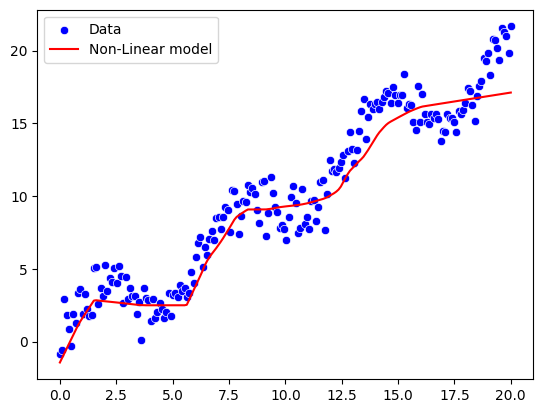

In [15]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Non-Linear model')
